In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
phishing_ds = pd.read_csv("phishing_url.csv")
df = pd.read_csv("phishing_url.csv")

In [5]:
df

FILENAME                                                URL  \
0        521848.txt                   https://www.southbankmosaics.com   
1         31372.txt                           https://www.uni-mainz.de   
2        597387.txt                     https://www.voicefmradio.co.uk   
3        554095.txt                        https://www.sfnmjournal.com   
4        151578.txt                 https://www.rewildingargentina.org   
...             ...                                                ...   
235790   660997.txt                     https://www.skincareliving.com   
235791    77185.txt                      https://www.winchester.gov.uk   
235792   622132.txt                    https://www.nononsensedesign.be   
235793  7503962.txt  https://patient-cell-40f5.updatedlogmylogin.wo...   
235794   384822.txt                 https://www.alternativefinland.com   

        URLLength                                           Domain  \
0              31                         www.southbankmosaics.com   
1              23                                 www.uni-mainz.de   
2              29                           www.voicefmradio.co.uk   
3              26                              www.sfnmjournal.com   
4              33                       www.rewildingargentina.org   
...           ...                                              ...   
235790         29                           www.skincareliving.com   
235791         28                            www.winchester.gov.uk   
235792         30                          www.nononsensedesign.be   
235793         55  patient-cell-40f5.updatedlogmylogin.workers.dev   
235794         33                       www.alternativefinland.com   

        DomainLength  IsDomainIP  TLD  URLSimilarityIndex  \
0                 24           0  com          100.000000   
1                 16           0   de          100.000000   
2                 22           0   uk          100.000000   
3                 19           0  com          100.000000   
4                 26           0  org          100.000000   
...              ...         ...  ...                 ...   
235790            22           0  com          100.000000   
235791            21           0   uk          100.000000   
235792            23           0   be          100.000000   
235793            47           0  dev           28.157537   
235794            26           0  com          100.000000   

        CharContinuationRate  TLDLegitimateProb  ...  Pay  Crypto  \
0                   1.000000           0.522907  ...    0       0   
1                   0.666667           0.032650  ...    0       0   
2                   0.866667           0.028555  ...    0       0   
3                   1.000000           0.522907  ...    1       1   
4                   1.000000           0.079963  ...    1       0   
...                      ...                ...  ...  ...     ...   
235790              1.000000           0.522907  ...    1       0   
235791              0.785714           0.028555  ...    1       0   
235792              1.000000           0.003319  ...    0       0   
235793              0.465116           0.000961  ...    0       0   
235794              1.000000           0.522907  ...    0       0   

        HasCopyrightInfo  NoOfImage  NoOfCSS  NoOfJS  NoOfSelfRef  \
0                      1         34       20      28          119   
1                      1         50        9       8           39   
2                      1         10        2       7           42   
3                      1          3       27      15           22   
4                      1        244       15      34           72   
...                  ...        ...      ...     ...          ...   
235790                 1         51        7      21          187   
235791                 0         50        1       7           88   
235792                 1         27       10      30           58   
235793                 0     

# Data preprocessing

In [7]:
df.describe()

URLLength   DomainLength     IsDomainIP  URLSimilarityIndex  \
count  235795.000000  235795.000000  235795.000000       235795.000000   
mean       34.573095      21.470396       0.002706           78.430778   
std        41.314153       9.150793       0.051946           28.976055   
min        13.000000       4.000000       0.000000            0.155574   
25%        23.000000      16.000000       0.000000           57.024793   
50%        27.000000      20.000000       0.000000          100.000000   
75%        34.000000      24.000000       0.000000          100.000000   
max      6097.000000     110.000000       1.000000          100.000000   

       CharContinuationRate  TLDLegitimateProb    URLCharProb      TLDLength  \
count         235795.000000      235795.000000  235795.000000  235795.000000   
mean               0.845508           0.260423       0.055747       2.764456   
std                0.216632           0.251628       0.010587       0.599739   
min                0.000000           0.000000       0.001083       2.000000   
25%                0.680000           0.005977       0.050747       2.000000   
50%                1.000000           0.079963       0.057970       3.000000   
75%                1.000000           0.522907       0.062875       3.000000   
max                1.000000           0.522907       0.090824      13.000000   

       NoOfSubDomain  HasObfuscation  ...            Pay         Crypto  \
count  235795.000000   235795.000000  ...  235795.000000  235795.000000   
mean        1.164758        0.002057  ...       0.237007       0.023474   
std         0.600969        0.045306  ...       0.425247       0.151403   
min         0.000000        0.000000  ...       0.000000       0.000000   
25%         1.000000        0.000000  ...       0.000000       0.000000   
50%         1.000000        0.000000  ...       0.000000       0.000000   
75%         1.000000        0.000000  ...       0.000000       0.000000   
max        10.000000        1.000000  ...       1.000000       1.000000   

       HasCopyrightInfo      NoOfImage        NoOfCSS         NoOfJS  \
count     235795.000000  235795.000000  235795.000000  235795.000000   
mean           0.486775      26.075689       6.333111      10.522305   
std            0.499826      79.411815      74.866296      22.312192   
min            0.000000       0.000000       0.000000       0.000000   
25%            0.000000       0.000000       0.000000       0.000000   
50%            0.000000       8.000000       2.000000       6.000000   
75%            1.000000      29.000000       8.000000      15.000000   
max            1.000000    8956.000000   35820.000000    6957.000000   

         NoOfSelfRef   NoOfEmptyRef  NoOfExternalRef          label  
count  235795.000000  235795.000000    235795.000000  235795.000000  
mean       65.071113       2.377629        49.262516       0.571895  
std       176.687539      17.641097       161.027430       0.494805  
min         0.000000       0.000000         0.000000       0.000000  
25%         0.000000       0.000000         1.000000       0.000000  
50%        12.000000       0.000000        10.000000       1.000000  
75%        88.000000       1.000000        57.000000       1.000000  
max     27397.000000    4887.000000     27516.000000       1.000000  

[8 rows x 51 columns]

In [9]:
df.describe().transpose()

count          mean            std        min  \
URLLength                   235795.0     34.573095      41.314153  13.000000   
DomainLength                235795.0     21.470396       9.150793   4.000000   
IsDomainIP                  235795.0      0.002706       0.051946   0.000000   
URLSimilarityIndex          235795.0     78.430778      28.976055   0.155574   
CharContinuationRate        235795.0      0.845508       0.216632   0.000000   
TLDLegitimateProb           235795.0      0.260423       0.251628   0.000000   
URLCharProb                 235795.0      0.055747       0.010587   0.001083   
TLDLength                   235795.0      2.764456       0.599739   2.000000   
NoOfSubDomain               235795.0      1.164758       0.600969   0.000000   
HasObfuscation              235795.0      0.002057       0.045306   0.000000   
NoOfObfuscatedChar          235795.0      0.024861       1.876249   0.000000   
ObfuscationRatio            235795.0      0.000138       0.003817   0.000000   
NoOfLettersInURL            235795.0     19.428919      29.090330   0.000000   
LetterRatioInURL            235795.0      0.515946       0.123315   0.000000   
NoOfDegitsInURL             235795.0      1.881011      11.886695   0.000000   
DegitRatioInURL             235795.0      0.028616       0.070897   0.000000   
NoOfEqualsInURL             235795.0      0.062241       0.934704   0.000000   
NoOfQMarkInURL              235795.0      0.029403       0.193505   0.000000   
NoOfAmpersandInURL          235795.0      0.025056       0.836448   0.000000   
NoOfOtherSpecialCharsInURL  235795.0      2.340198       3.527603   0.000000   
SpacialCharRatioInURL       235795.0      0.063309       0.032393   0.000000   
IsHTTPS                     235795.0      0.782625       0.412461   0.000000   
LineOfCode                  235795.0   1141.900443    3419.950513   2.000000   
LargestLineLength           235795.0  12789.532624  152201.099228  22.000000   
HasTitle                    235795.0      0.861261       0.345675   0.000000   
DomainTitleMatchScore       235795.0     50.131427      49.676981   0.000000   
URLTitleMatchScore          235795.0     52.122098      49.600564   0.000000   
HasFavicon                  235795.0      0.361768       0.480513   0.000000   
Robots                      235795.0      0.266541       0.442151   0.000000   
IsResponsive                235795.0      0.624513       0.484249   0.000000   
NoOfURLRedirect             235795.0      0.133438       0.340048   0.000000   
NoOfSelfRedirect            235795.0      0.040107       0.196210   0.000000   
HasDescription              235795.0      0.440183       0.496410   0.000000   
NoOfPopup                   235795.0      0.221765       3.870540   0.000000   
NoOfiFrame                  235795.0      1.588638       5.762561   0.000000   
HasExternalFormSubmit       235795.0      0.043987       0.205067   0.000000   
HasSocialNet                235795.0      0.456570       0.498111   0.000000   
HasSubmitButton             235795.0      0.414301       0.492602   0.000000   
HasHiddenFields             235795.0      0.377799       0.484838   0.000000   
HasPasswordField            235795.0      0.102263       0.302994   0.000000   
Bank                        235795.0      0.127089       0.333074   0.000000   
Pay                         235795.0      0.237007       0.425247   0.000000   
Crypto                      235795.0      0.023474       0.151403   0.000000   
HasCopyrightInfo            235795.0      0.486775       0.499826   0.000000   
NoOfImage                   235795.0     26.075689      79.411815   0.000000   
NoOfCSS                     235795.0      6.333111      74.866296   0.000000   
NoOfJS                      235795.0     10.522305      22.312192   0.000000   
NoOfSelfRef                 235795.0     65.071113     176.687539   0.000000   
NoOfEmptyRef                235795.0      2.377629      17.641097   0.000000   
NoOfExternalRef             235

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 56 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   FILENAME                    235795 non-null  object 
 1   URL                         235795 non-null  object 
 2   URLLength                   235795 non-null  int64  
 3   Domain                      235795 non-null  object 
 4   DomainLength                235795 non-null  int64  
 5   IsDomainIP                  235795 non-null  int64  
 6   TLD                         235795 non-null  object 
 7   URLSimilarityIndex          235795 non-null  float64
 8   CharContinuationRate        235795 non-null  float64
 9   TLDLegitimateProb           235795 non-null  float64
 10  URLCharProb                 235795 non-null  float64
 11  TLDLength                   235795 non-null  int64  
 12  NoOfSubDomain               235795 non-null  int64  
 13  HasObfuscation

In [13]:
df.isnull().sum()

FILENAME                      0
URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitle

In [15]:
# Removing FILENAME, URL, and Domain as they do not contribute to predictive modeling.
df = df.drop(columns=["FILENAME", "URL", "Domain"])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  int64  
 1   DomainLength                235795 non-null  int64  
 2   IsDomainIP                  235795 non-null  int64  
 3   TLD                         235795 non-null  object 
 4   URLSimilarityIndex          235795 non-null  float64
 5   CharContinuationRate        235795 non-null  float64
 6   TLDLegitimateProb           235795 non-null  float64
 7   URLCharProb                 235795 non-null  float64
 8   TLDLength                   235795 non-null  int64  
 9   NoOfSubDomain               235795 non-null  int64  
 10  HasObfuscation              235795 non-null  int64  
 11  NoOfObfuscatedChar          235795 non-null  int64  
 12  ObfuscationRatio            235795 non-null  float64
 13  NoOfLettersInU

In [19]:
# Label Encoding of the columns Title and TLD
from sklearn.preprocessing import LabelEncoder

In [21]:
label_encoder = LabelEncoder()

In [23]:
df["TLD"] = label_encoder.fit_transform(df["TLD"])
df["Title"] = label_encoder.fit_transform(df["Title"])

In [25]:
df["TLD"]

0         231
1         254
2         647
3         231
4         503
         ... 
235790    231
235791    647
235792    157
235793    258
235794    231
Name: TLD, Length: 235795, dtype: int32

In [27]:
df["Title"]

0         197871
1          93363
2         187338
3          81289
4          69782
           ...  
235790    160270
235791    191644
235792    126238
235793    134912
235794      9826
Name: Title, Length: 235795, dtype: int32

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URLLength                   235795 non-null  int64  
 1   DomainLength                235795 non-null  int64  
 2   IsDomainIP                  235795 non-null  int64  
 3   TLD                         235795 non-null  int32  
 4   URLSimilarityIndex          235795 non-null  float64
 5   CharContinuationRate        235795 non-null  float64
 6   TLDLegitimateProb           235795 non-null  float64
 7   URLCharProb                 235795 non-null  float64
 8   TLDLength                   235795 non-null  int64  
 9   NoOfSubDomain               235795 non-null  int64  
 10  HasObfuscation              235795 non-null  int64  
 11  NoOfObfuscatedChar          235795 non-null  int64  
 12  ObfuscationRatio            235795 non-null  float64
 13  NoOfLettersInU

In [31]:
#normalization of the features - URLSimilarityIndex, LetterRatioInURL, ObfuscationRatio

In [33]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler()

In [37]:
features_to_scale = [
    "URLLength", "DomainLength", "NoOfSubDomain", "LargestLineLength",
    "LetterRatioInURL", "NoOfLettersInURL", "NoOfDegitsInURL", "NoOfOtherSpecialCharsInURL",
    "URLSimilarityIndex", "ObfuscationRatio", "NoOfObfuscatedChar",
    "LineOfCode", "DomainTitleMatchScore"
]

In [39]:
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

In [41]:
df

URLLength  DomainLength  IsDomainIP  TLD  URLSimilarityIndex  \
0       -0.086486      0.276436           0  231            0.744382   
1       -0.280125     -0.597807           0  254            0.744382   
2       -0.134896      0.057875           0  647            0.744382   
3       -0.207510     -0.269966           0  231            0.744382   
4       -0.038077      0.494997           0  503            0.744382   
...           ...           ...         ...  ...                 ...   
235790  -0.134896      0.057875           0  231            0.744382   
235791  -0.159101     -0.051405           0  647            0.744382   
235792  -0.110691      0.167156           0  157            0.744382   
235793   0.494430      2.789885           0  258           -1.734996   
235794  -0.038077      0.494997           0  231            0.744382   

        CharContinuationRate  TLDLegitimateProb  URLCharProb  TLDLength  \
0                   1.000000           0.522907     0.061933          3   
1                   0.666667           0.032650     0.050207          2   
2                   0.866667           0.028555     0.064129          2   
3                   1.000000           0.522907     0.057606          3   
4                   1.000000           0.079963     0.059441          3   
...                      ...                ...          ...        ...   
235790              1.000000           0.522907     0.058739          3   
235791              0.785714           0.028555     0.053834          2   
235792              1.000000           0.003319     0.063093          2   
235793              0.465116           0.000961     0.050211          3   
235794              1.000000           0.522907     0.060596          3   

        NoOfSubDomain  ...  Pay  Crypto  HasCopyrightInfo  NoOfImage  NoOfCSS  \
0           -0.274154  ...    0       0                 1         34       20   
1           -0.274154  ...    0       0                 1         50        9   
2            1.389828  ...    0       0                 1         10        2   
3           -0.274154  ...    1       1                 1          3       27   
4           -0.274154  ...    1       0                 1        244       15   
...               ...  ...  ...     ...               ...        ...      ...   
235790      -0.274154  ...    1       0                 1         51        7   
235791       1.389828  ...    1       0                 0         50        1   
235792      -0.274154  ...    0       0                 1         27       10   
235793       1.389828  ...    0       0                 0          0        0   
235794      -0.274154  ...    0       0                 1         21        6   

        NoOfJS  NoOfSelfRef  NoOfEmptyRef  NoOfExternalRef  label  
0           28          119             0              124      1  
1            8           39             0              217      1  
2            7           42             2                5      1  
3           15           22             1               31      1  
4           34           72             1               85      1  
...        ...          ...           ...              ...    ...  
235790      21          187             2              191      1  
235791       7           88             0               31      1  
235792      30           58             2               67      1  
235793       3            0             0                0      0  
235794      18          256             0              261      1  

[235795 rows x 53 columns]

# visualization

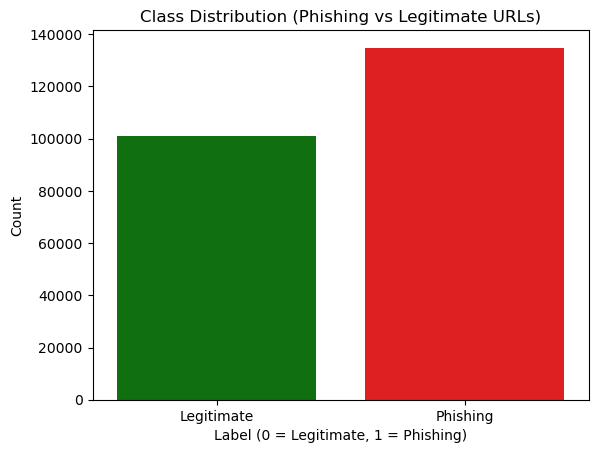

In [24]:
# class distribution (Phishing vs. Legitimate)
sns.countplot(x=df["label"], palette=["green", "red"])
plt.title("Class Distribution (Phishing vs Legitimate URLs)")
plt.xlabel("Label (0 = Legitimate, 1 = Phishing)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["Legitimate", "Phishing"])
plt.show()

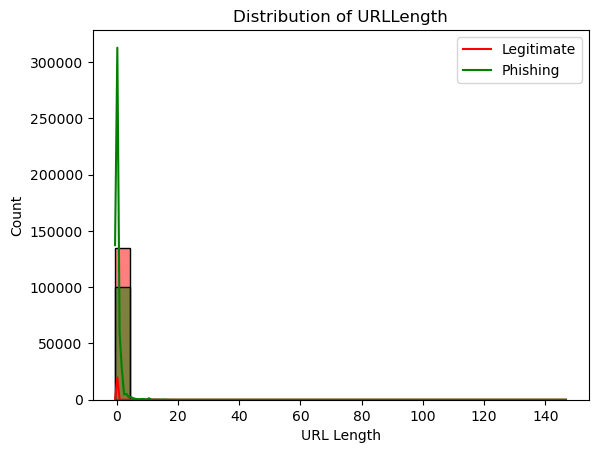

In [25]:
sns.histplot(data=df, x="URLLength", hue="label", kde=True, bins=30, palette=["green", "red"])
plt.title(f"Distribution of {"URLLength"}")
plt.xlabel("URL Length")
plt.ylabel("Count")
plt.legend(labels=["Legitimate", "Phishing"])
plt.show()

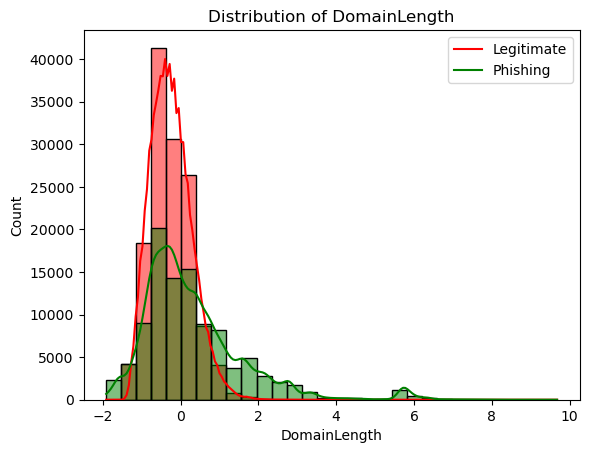

In [26]:
sns.histplot(data=df, x="DomainLength", hue="label", kde=True, bins=30, palette=["green", "red"])
plt.title(f"Distribution of {"DomainLength"}")
plt.xlabel("DomainLength")
plt.ylabel("Count")
plt.legend(labels=["Legitimate", "Phishing"])
plt.show()

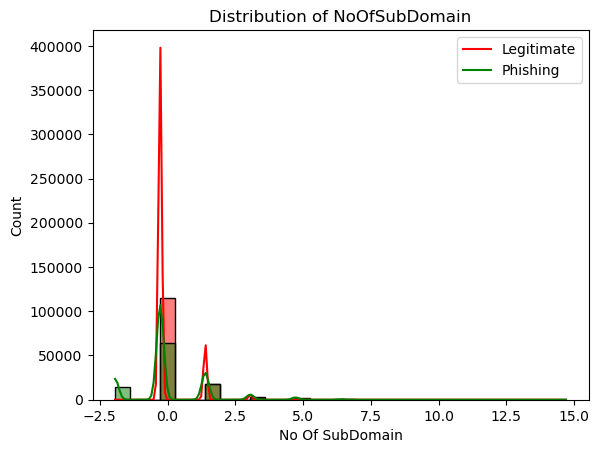

In [27]:
sns.histplot(data=df, x="NoOfSubDomain", hue="label", kde=True, bins=30, palette=["green", "red"])
plt.title(f"Distribution of {"NoOfSubDomain"}")
plt.xlabel("No Of SubDomain")
plt.ylabel("Count")
plt.legend(labels=["Legitimate", "Phishing"])
plt.show()

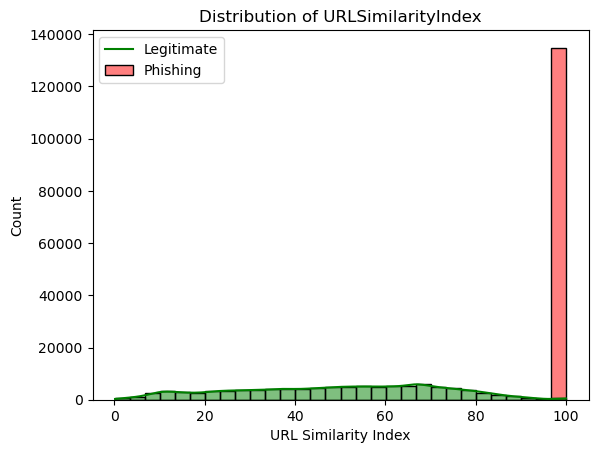

In [28]:
sns.histplot(data=phishing_ds, x="URLSimilarityIndex", hue="label", kde=True, bins=30, palette=["green", "red"])
plt.title(f"Distribution of {"URLSimilarityIndex"}")
plt.xlabel("URL Similarity Index")
plt.ylabel("Count")
plt.legend(labels=["Legitimate", "Phishing"])
plt.show()

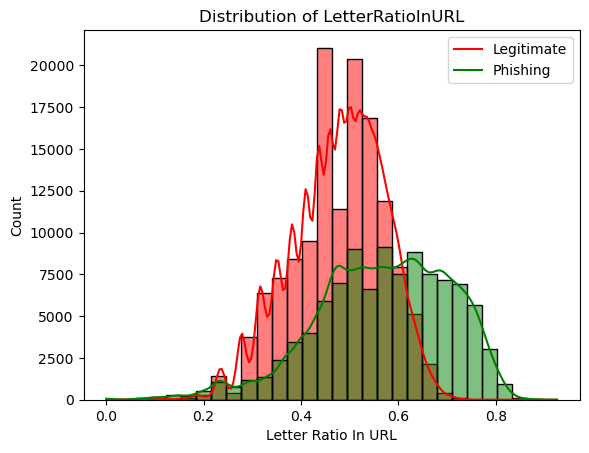

In [29]:
sns.histplot(data=phishing_ds, x="LetterRatioInURL", hue="label", kde=True, bins=30, palette=["green", "red"])
plt.title(f"Distribution of {"LetterRatioInURL"}")
plt.xlabel("Letter Ratio In URL")
plt.ylabel("Count")
plt.legend(labels=["Legitimate", "Phishing"])
plt.show()

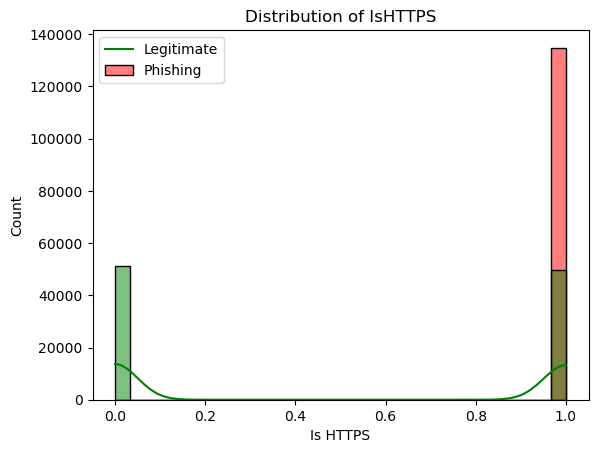

In [30]:
sns.histplot(data=phishing_ds, x="IsHTTPS", hue="label", kde=True, bins=30, palette=["green", "red"])
plt.title(f"Distribution of {"IsHTTPS"}")
plt.xlabel("Is HTTPS")
plt.ylabel("Count")
plt.legend(labels=["Legitimate", "Phishing"])
plt.show()

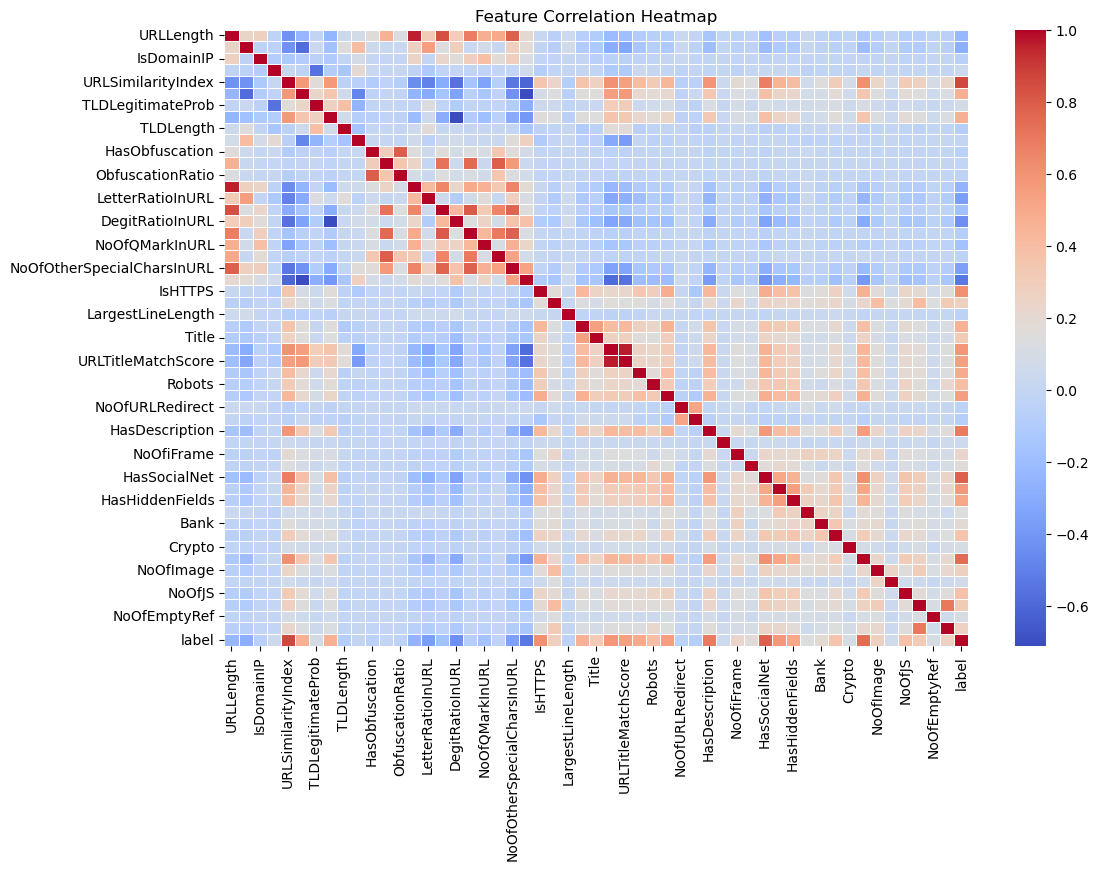

In [31]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

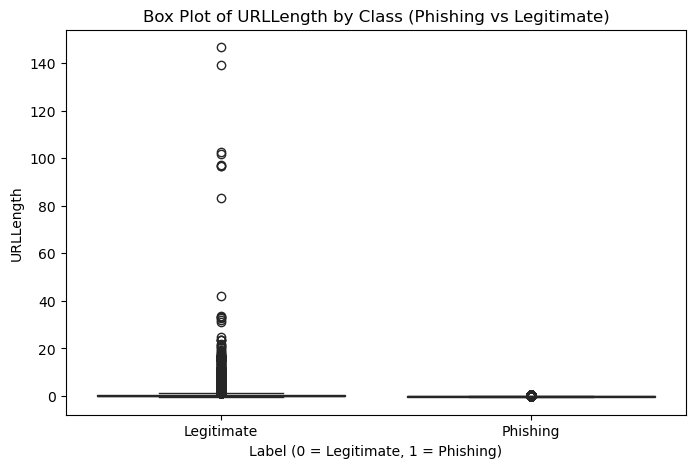

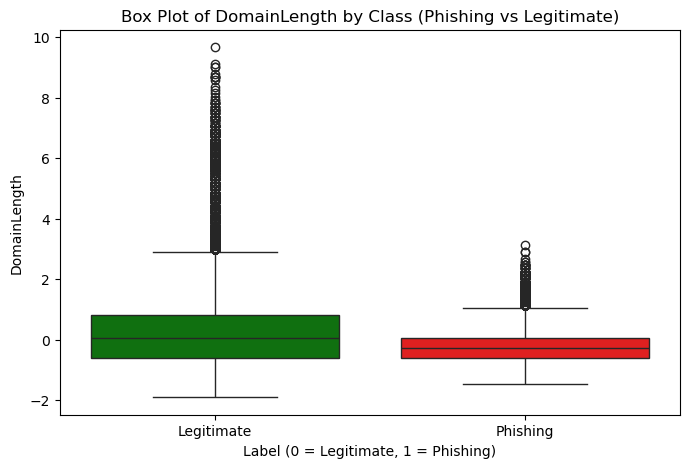

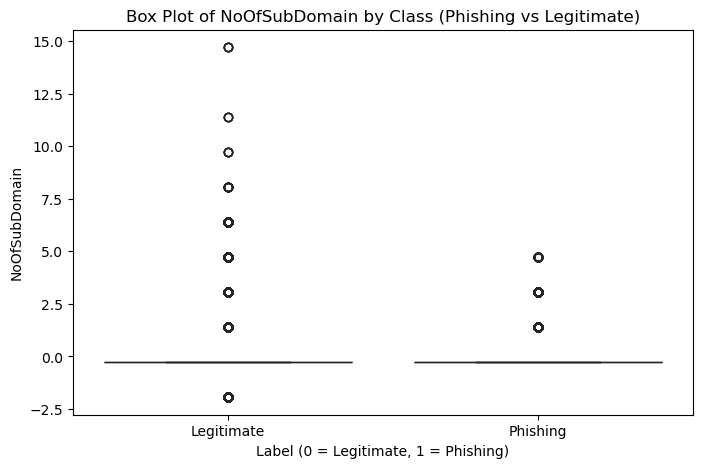

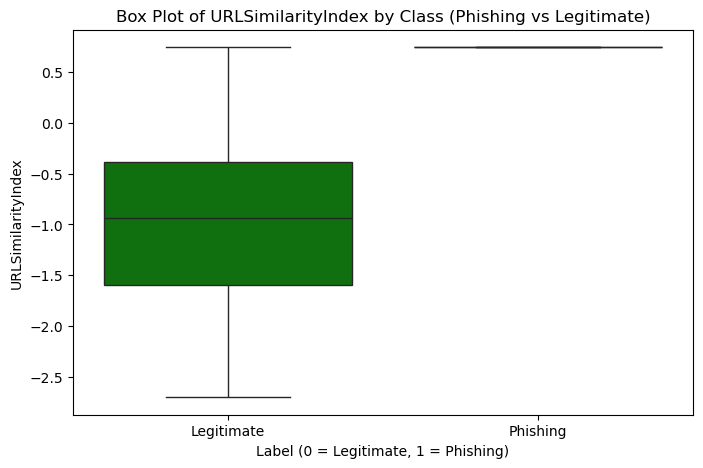

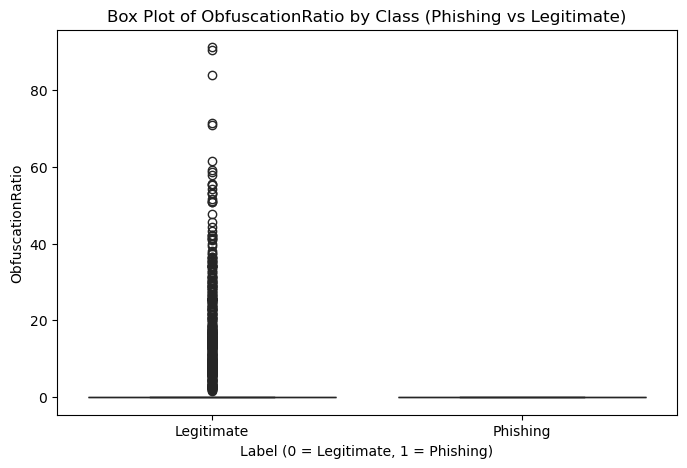

In [32]:
# Box Plots: Outlier Detection in Numerical Features
features_box = ["URLLength", "DomainLength", "NoOfSubDomain", "URLSimilarityIndex", "ObfuscationRatio"]
for f in features_box:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df["label"], y=df[f], palette=["green", "red"])
    plt.title(f"Box Plot of {f} by Class (Phishing vs Legitimate)")
    plt.xlabel("Label (0 = Legitimate, 1 = Phishing)")
    plt.ylabel(f)
    plt.xticks(ticks=[0, 1], labels=["Legitimate", "Phishing"])
    plt.show()
    print("\n")

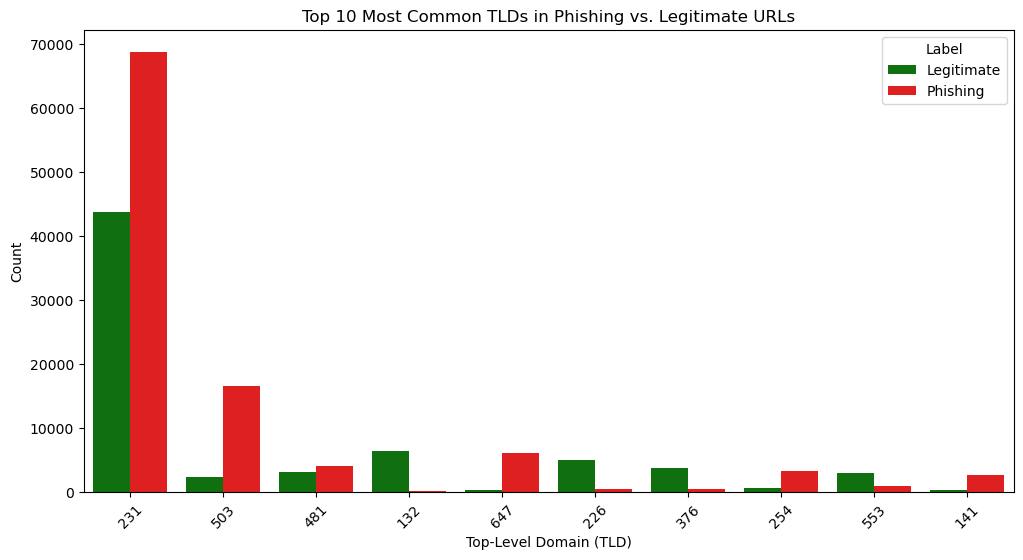

In [33]:
# Count Plot: Distribution of Categorical Features
plt.figure(figsize=(12, 6))
sns.countplot(x=df["TLD"], hue=df["label"], palette=["green", "red"], order=df["TLD"].value_counts().index[:10])
plt.title("Top 10 Most Common TLDs in Phishing vs. Legitimate URLs")
plt.xlabel("Top-Level Domain (TLD)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Label", labels=["Legitimate", "Phishing"])
plt.show()

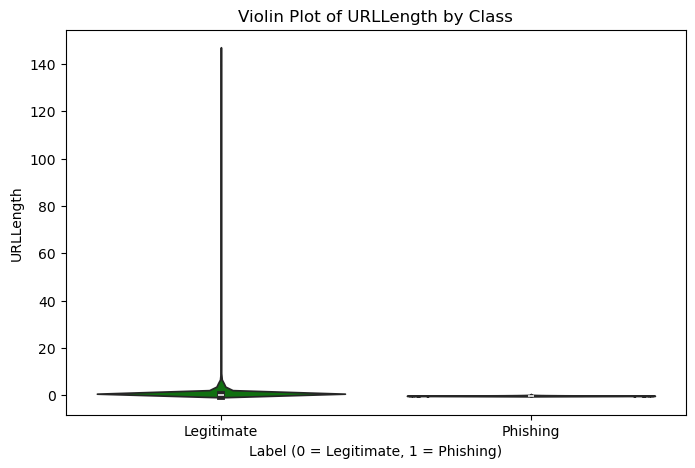

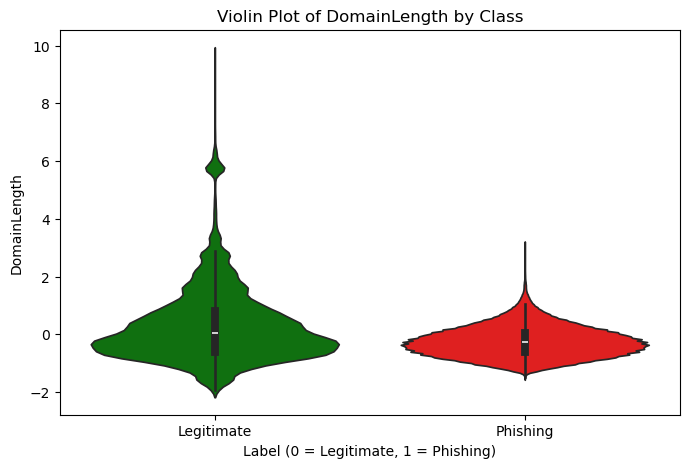

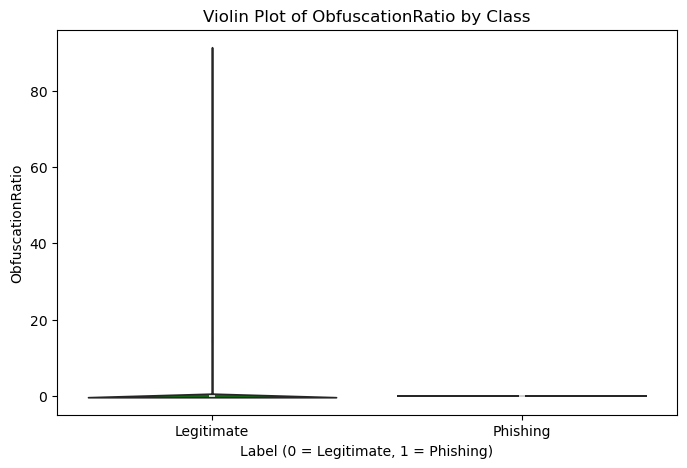

In [34]:
#Violin Plots: Feature Distributions per Class
for feature in ["URLLength", "DomainLength", "ObfuscationRatio"]:
    plt.figure(figsize=(8, 5))
    sns.violinplot(x=df["label"], y=df[feature], palette=["green", "red"])
    plt.title(f"Violin Plot of {feature} by Class")
    plt.xlabel("Label (0 = Legitimate, 1 = Phishing)")
    plt.ylabel(feature)
    plt.xticks(ticks=[0, 1], labels=["Legitimate", "Phishing"])
    plt.show()

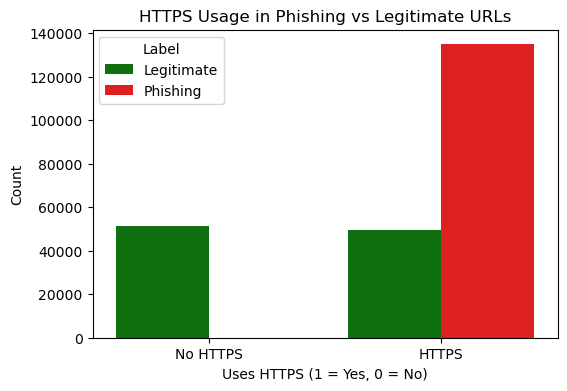

In [35]:
#HTTPS Usage in Phishing vs. Legitimate URLs
plt.figure(figsize=(6, 4))
sns.countplot(x=df["IsHTTPS"], hue=df["label"], palette=["green", "red"])
plt.title("HTTPS Usage in Phishing vs Legitimate URLs")
plt.xlabel("Uses HTTPS (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=["No HTTPS", "HTTPS"])
plt.legend(title="Label", labels=["Legitimate", "Phishing"])
plt.show()

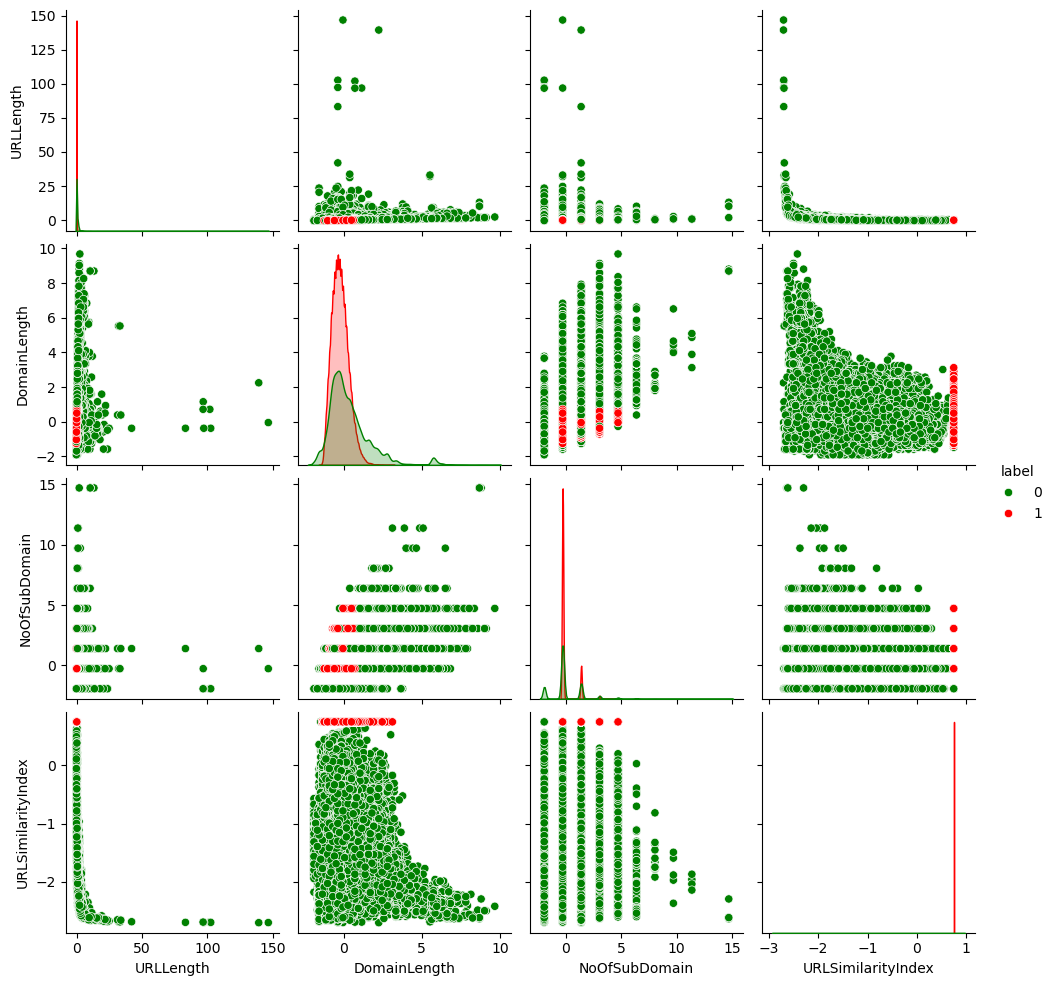

In [36]:
# Relationship Between Multiple Features
sns.pairplot(df, vars=["URLLength", "DomainLength", "NoOfSubDomain", "URLSimilarityIndex"], hue="label", palette=["green", "red"])
plt.show()

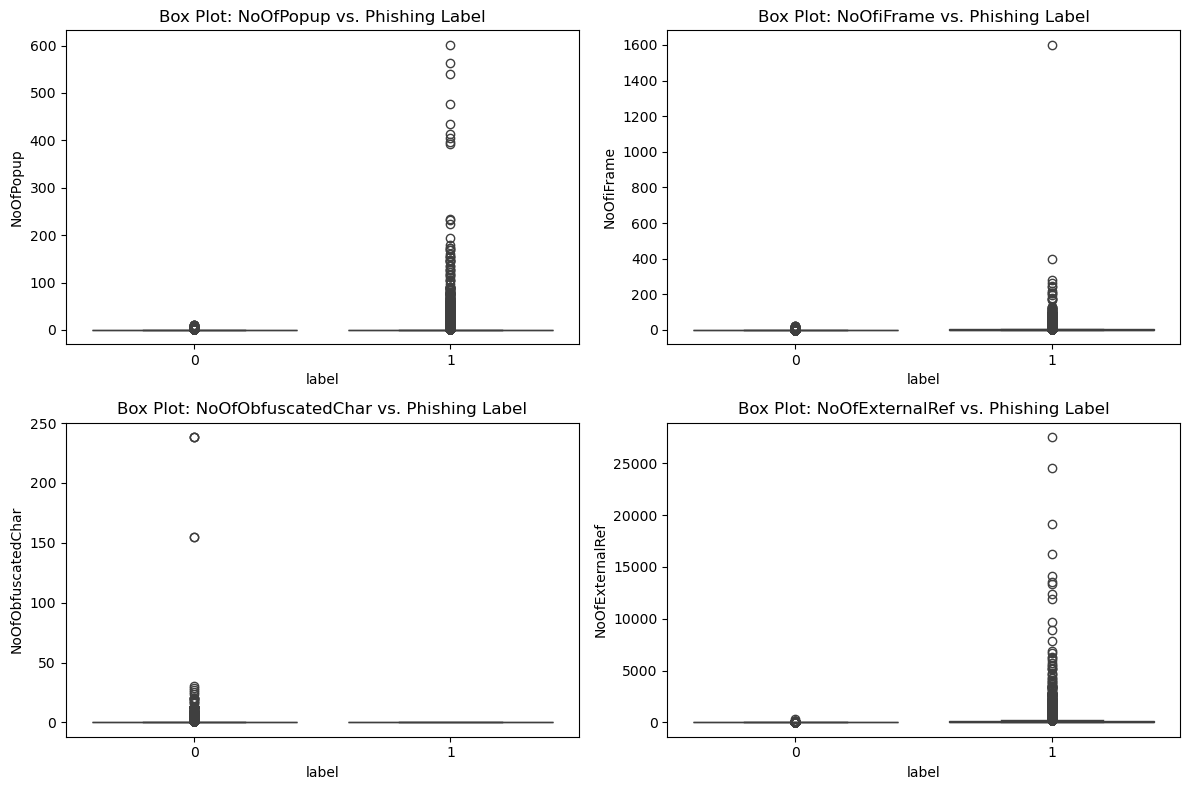

In [37]:
# Box Plots for Outliers Detection
num_features = ["NoOfPopup", "NoOfiFrame", "NoOfObfuscatedChar", "NoOfExternalRef"]
plt.figure(figsize=(12, 8))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=df["label"], y=df[feature])
    plt.title(f"Box Plot: {feature} vs. Phishing Label")

plt.tight_layout()
plt.show()

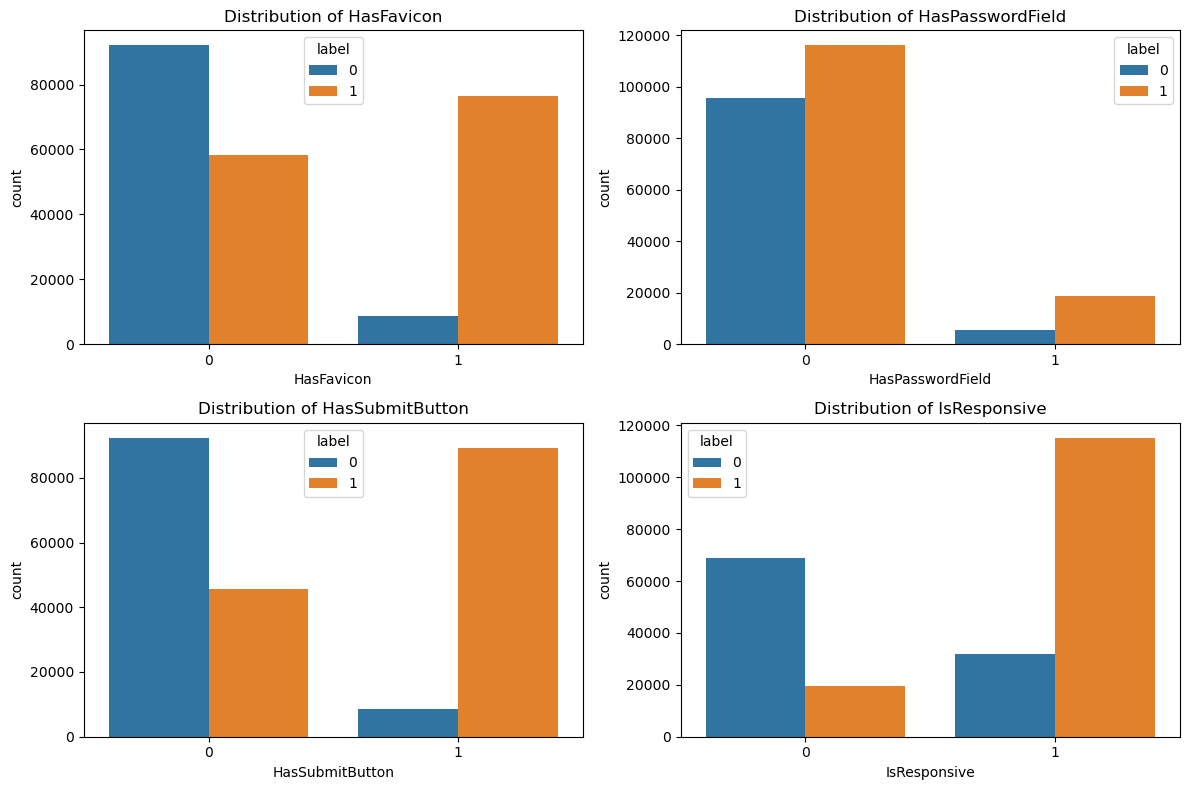

In [38]:
# Count Plot for Categorical Features
cat_features = ["HasFavicon", "HasPasswordField", "HasSubmitButton", "IsResponsive"]
plt.figure(figsize=(12, 8))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df[feature], hue=df["label"])
    plt.title(f"Distribution of {feature}")
plt.tight_layout()
plt.show()

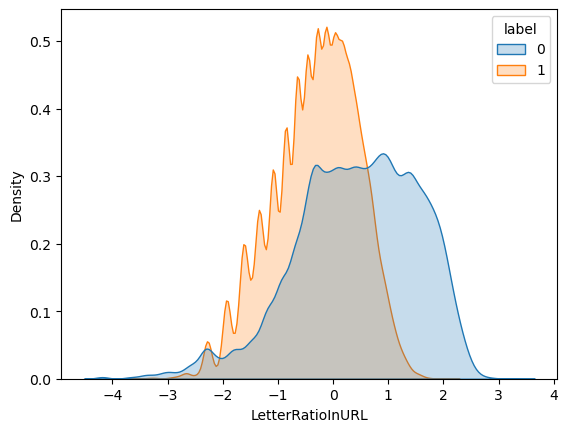

In [39]:
# KDE Plot for URL Character Ratios
sns.kdeplot(data=df, x="LetterRatioInURL", hue="label", fill=True, common_norm=False)
plt.show()

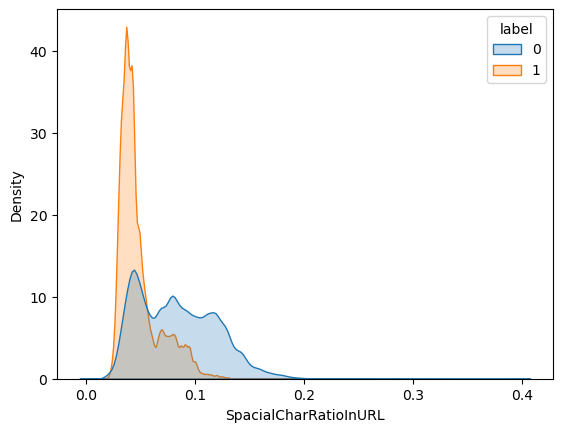

In [40]:
sns.kdeplot(data=df, x="SpacialCharRatioInURL", hue="label", fill=True, common_norm=False)
plt.show()

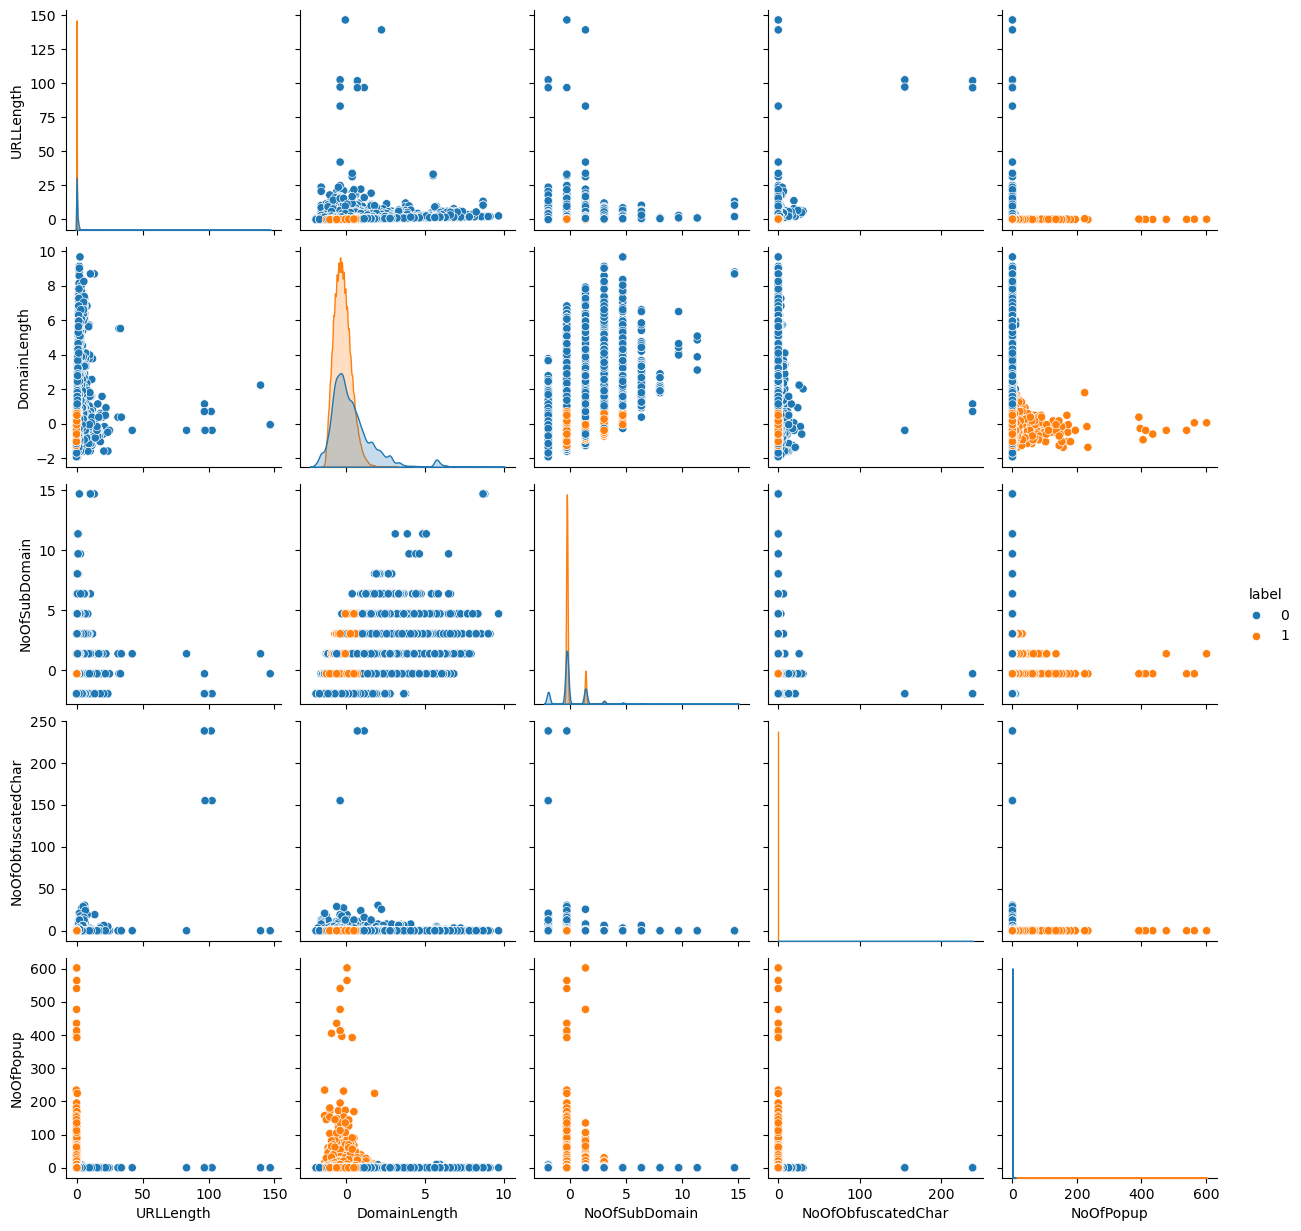

In [41]:
# Pairwise Correlation of Important Features
selected_features = ["URLLength", "DomainLength", "NoOfSubDomain", "NoOfObfuscatedChar", "NoOfPopup", "label"]
sns.pairplot(df[selected_features], hue="label")
plt.show()

# Handling Outliers

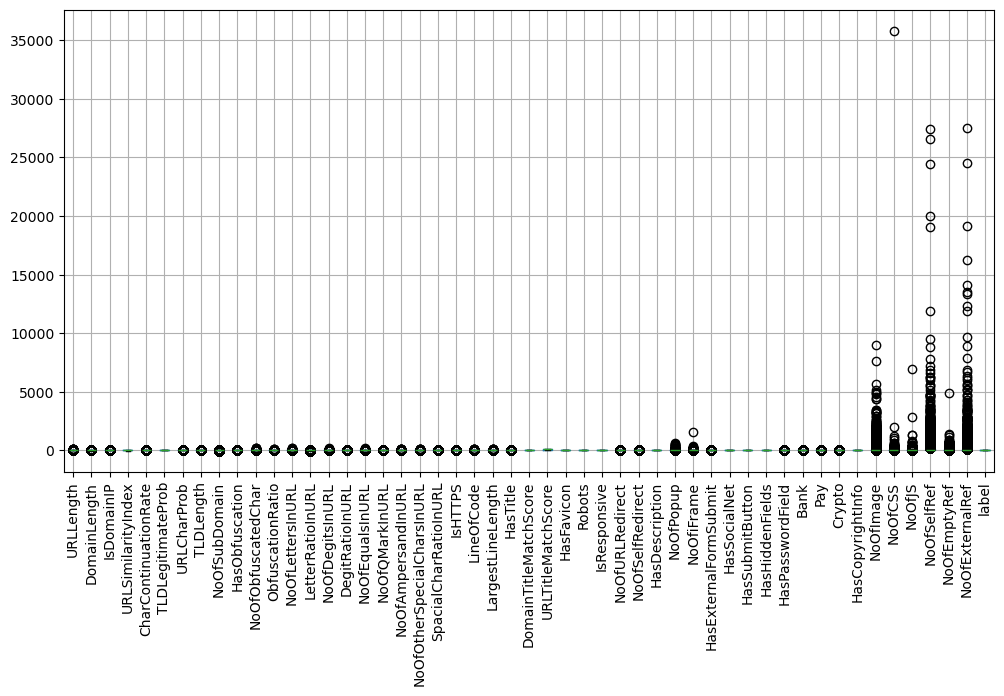

In [44]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.xticks(rotation=90)
plt.show()

In [48]:
# Capping outliers replaces extreme values with upper and lower percentile limits.
def cap_outliers(df, column, lower_percentile=0.05, upper_percentile=0.95):
    lower_limit = df[column].quantile(lower_percentile)
    upper_limit = df[column].quantile(upper_percentile)
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
for col in numeric_cols:
    cap_outliers(df, col)

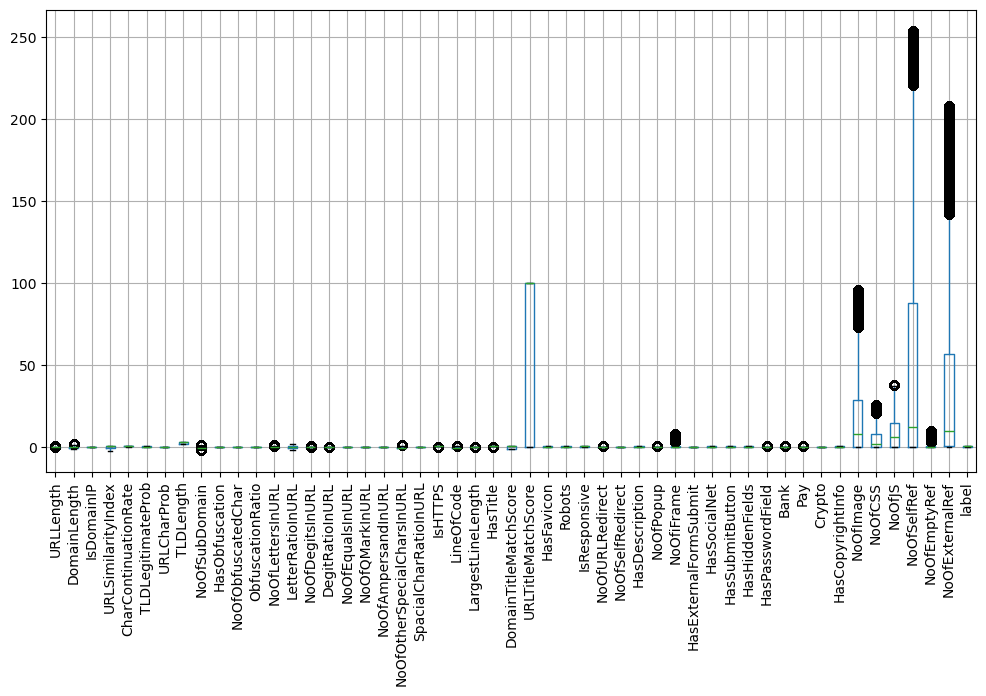

In [50]:
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.xticks(rotation=90)
plt.show()

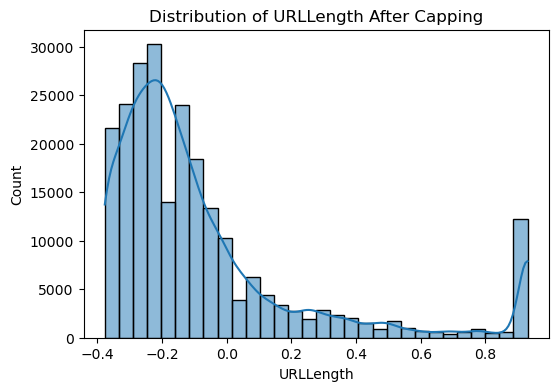

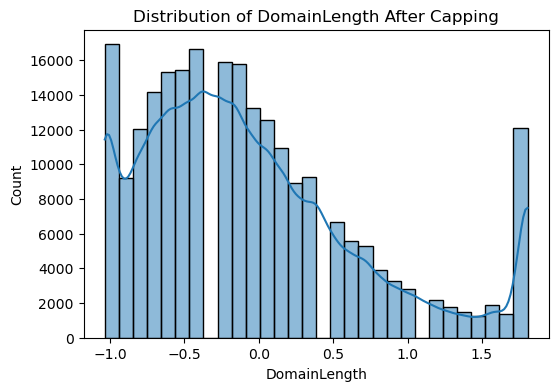

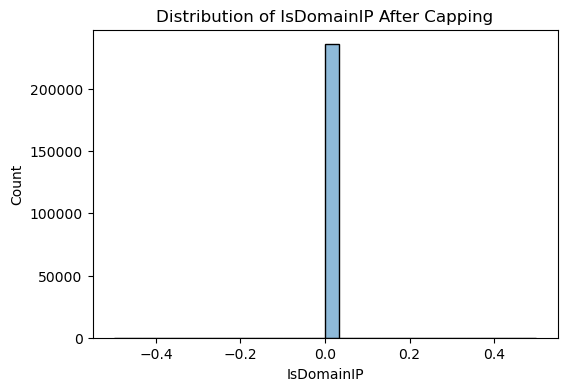

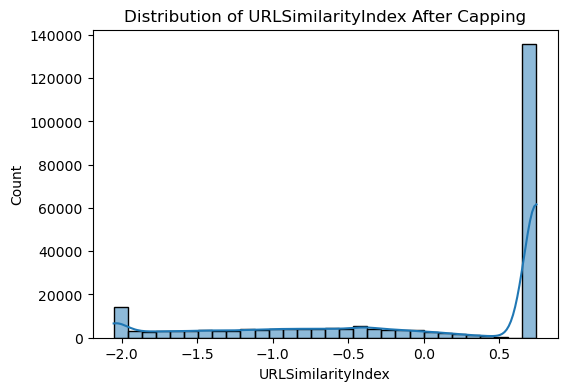

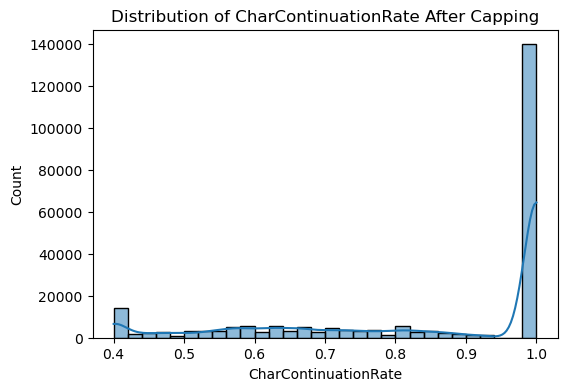

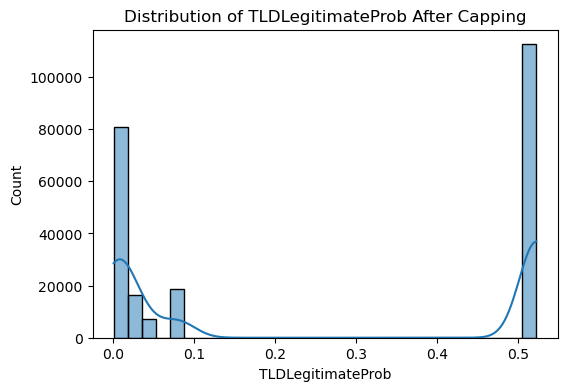

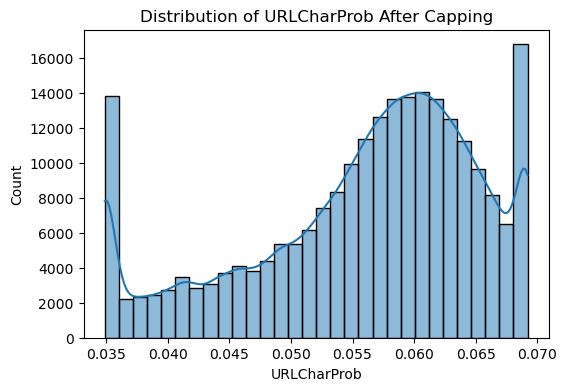

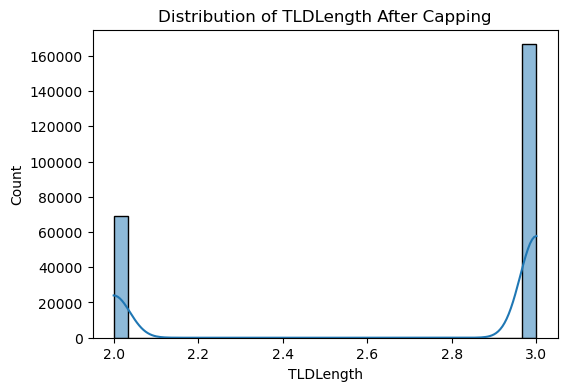

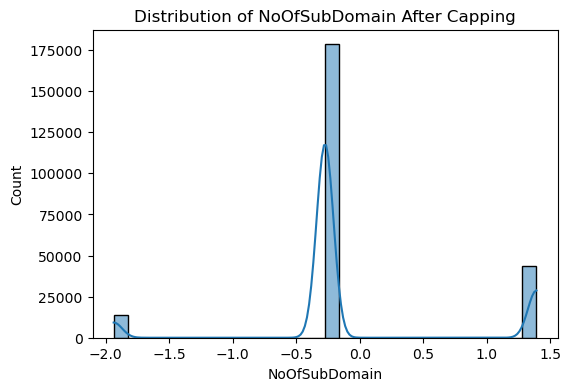

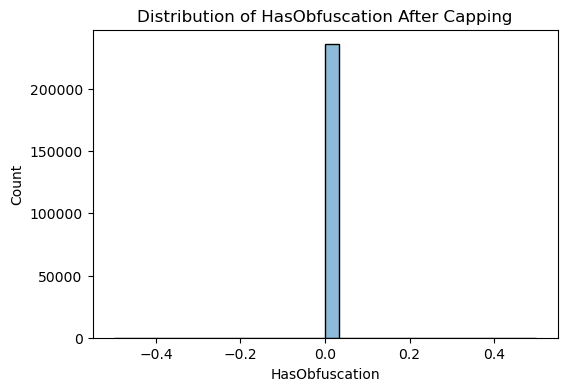

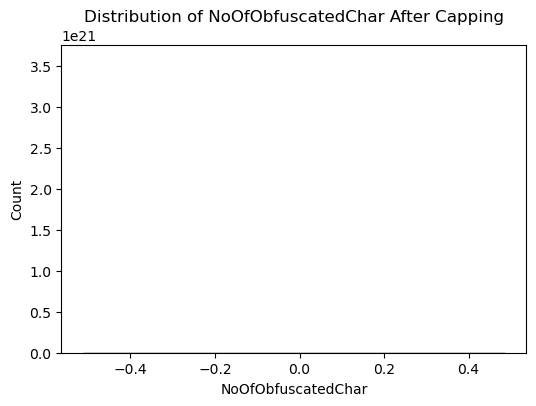

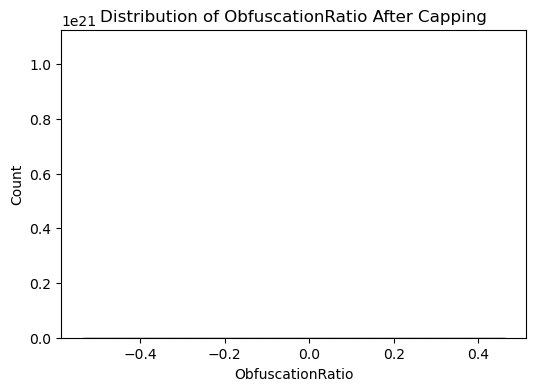

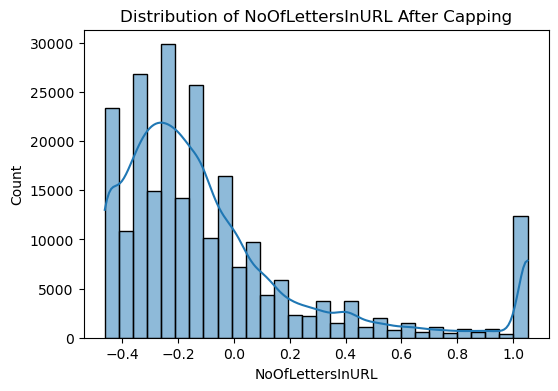

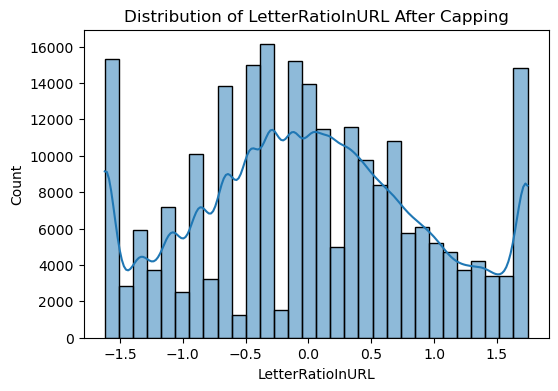

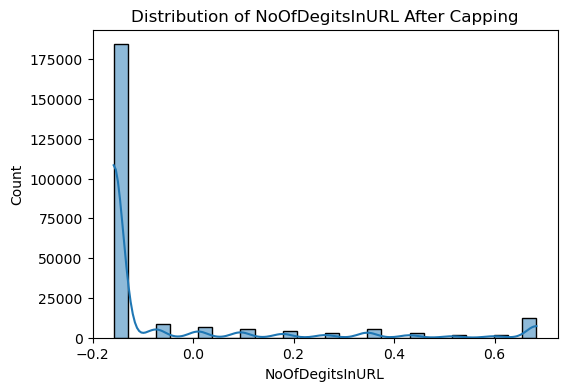

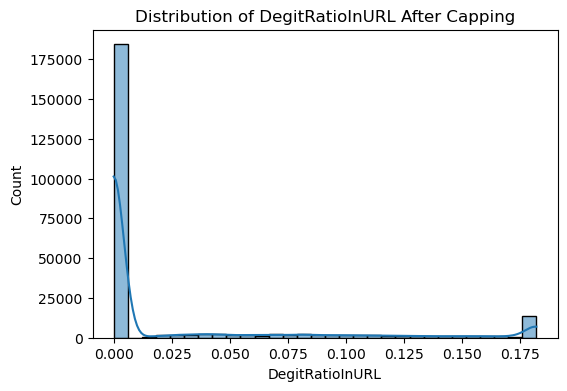

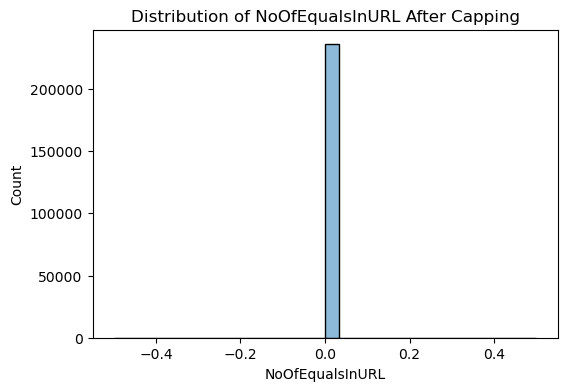

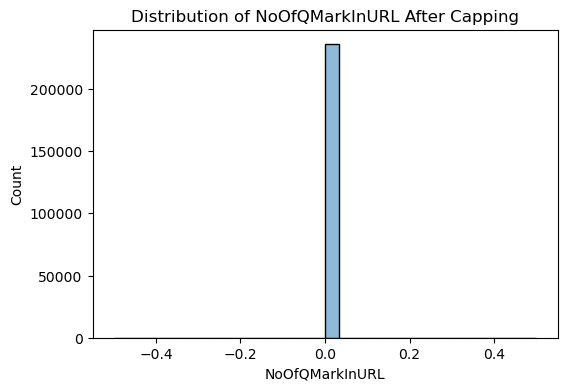

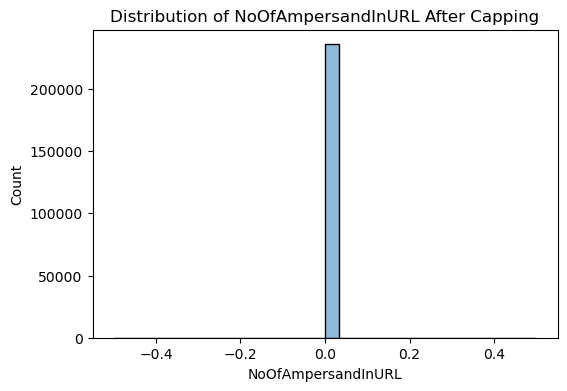

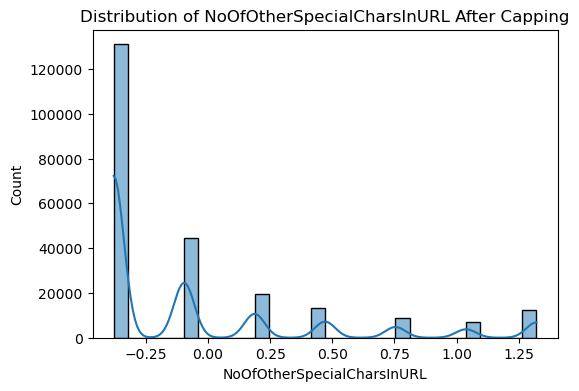

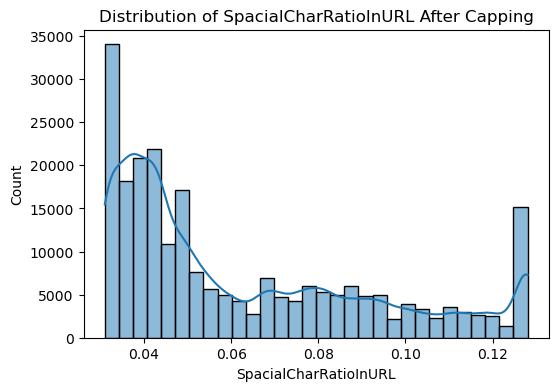

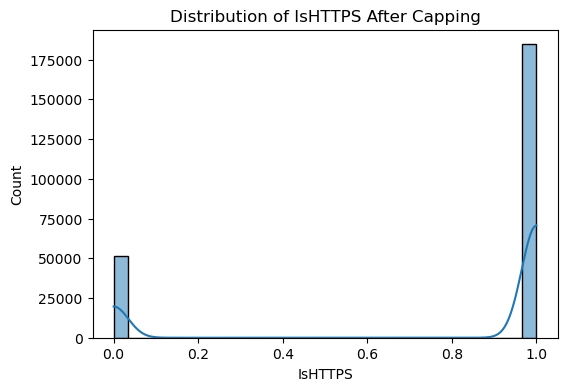

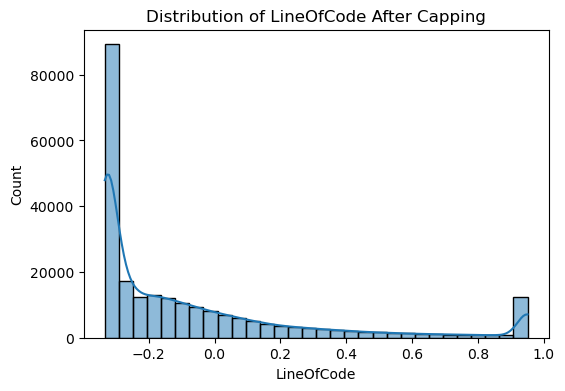

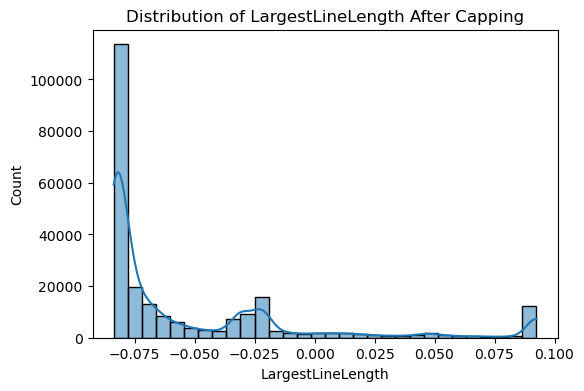

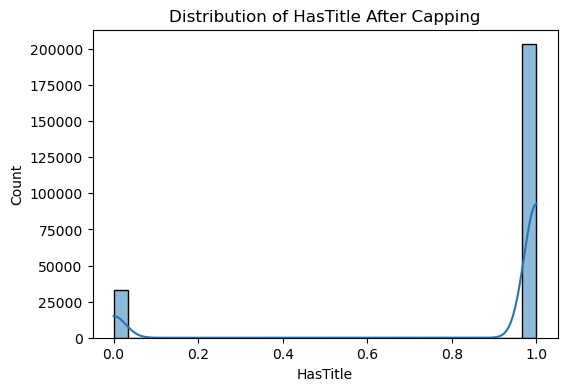

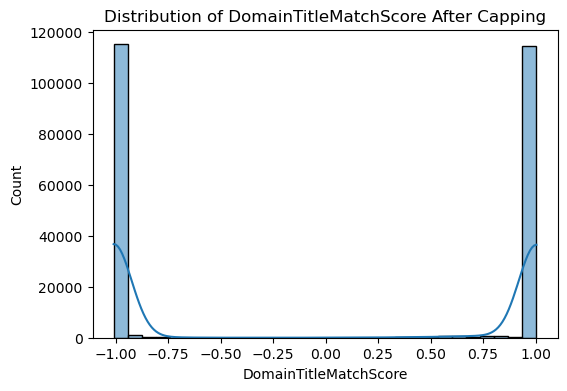

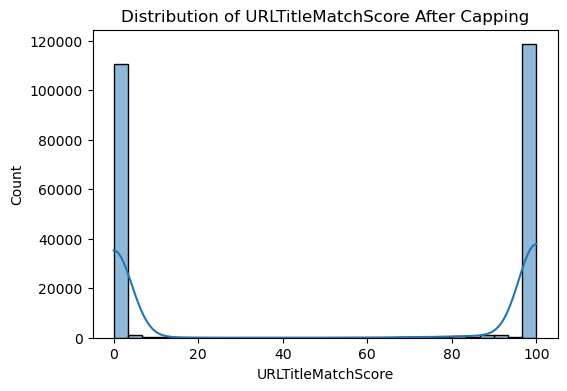

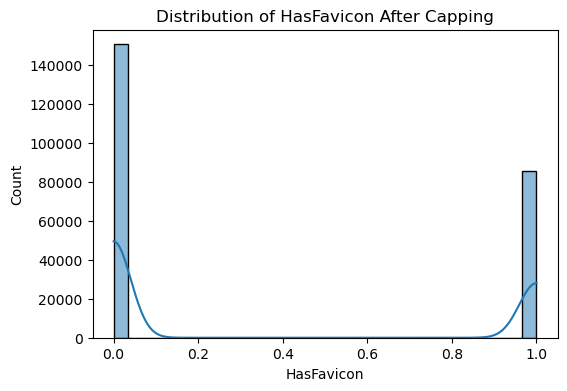

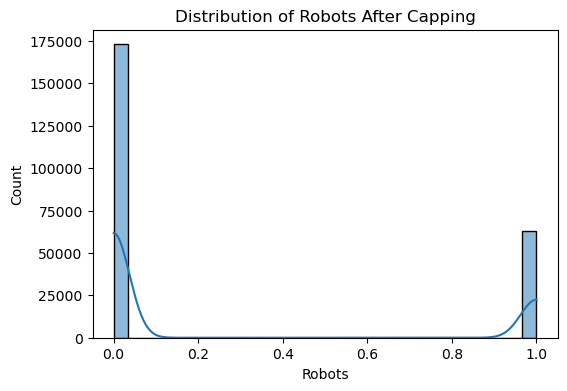

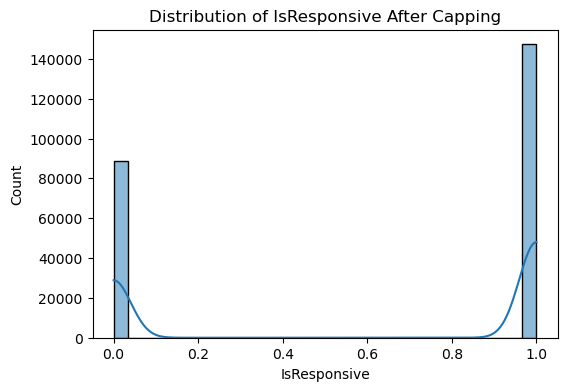

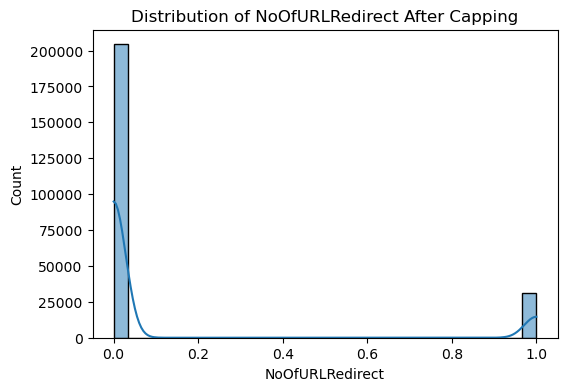

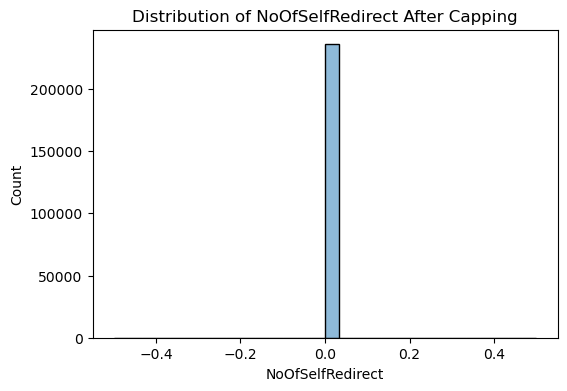

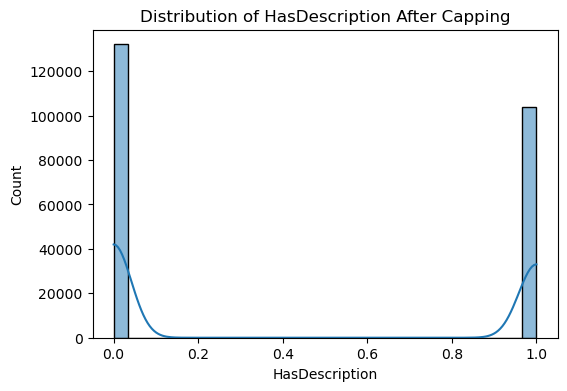

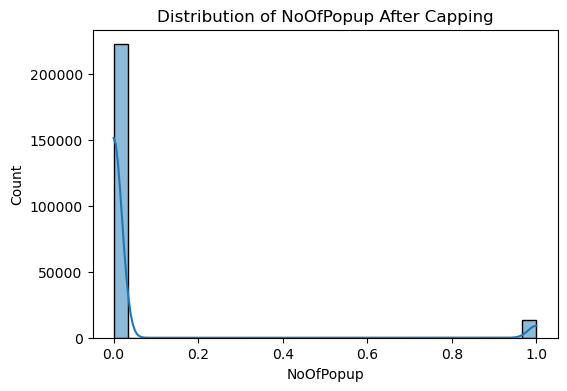

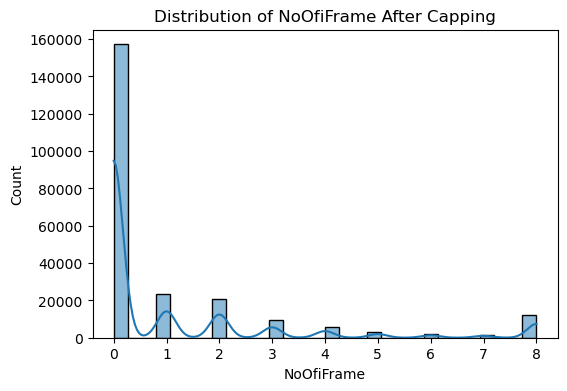

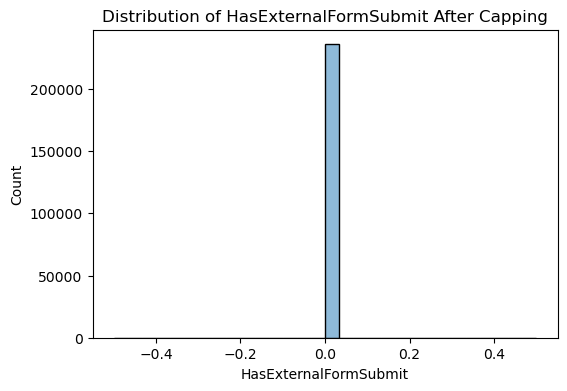

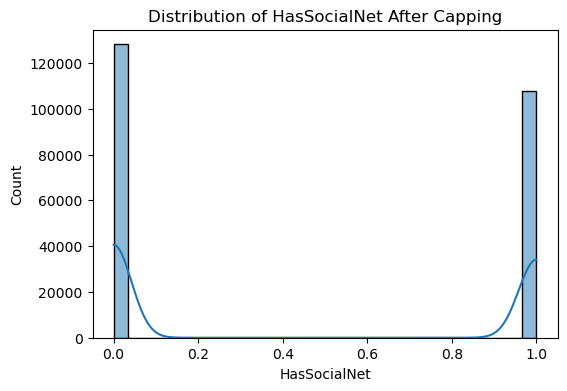

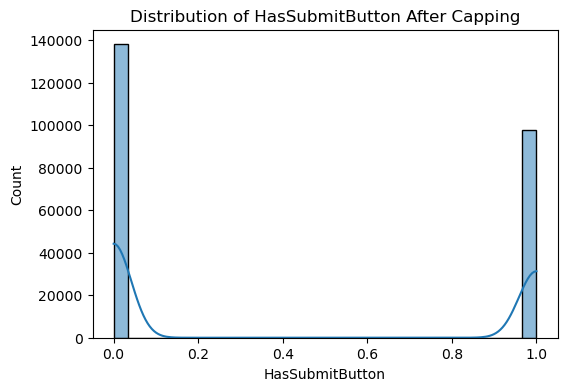

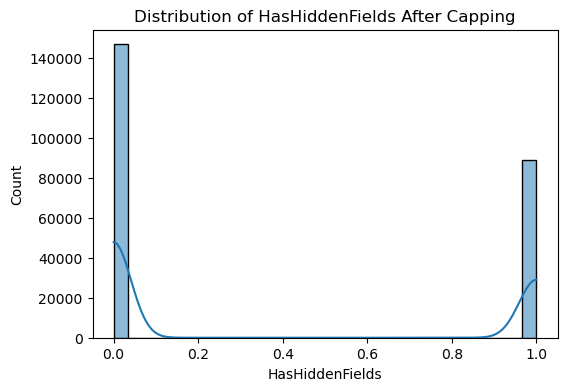

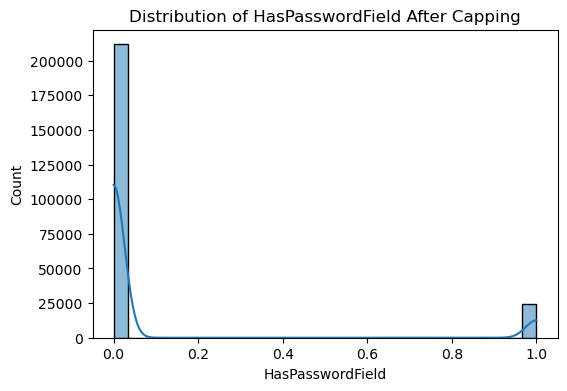

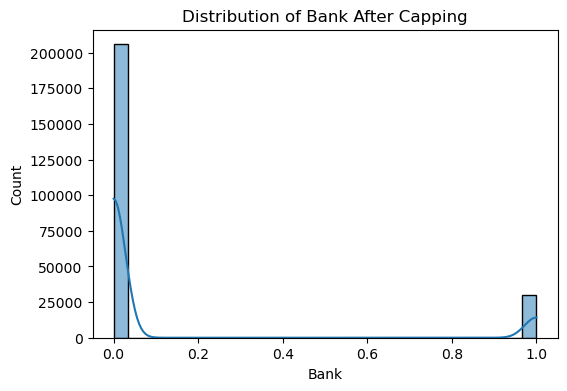

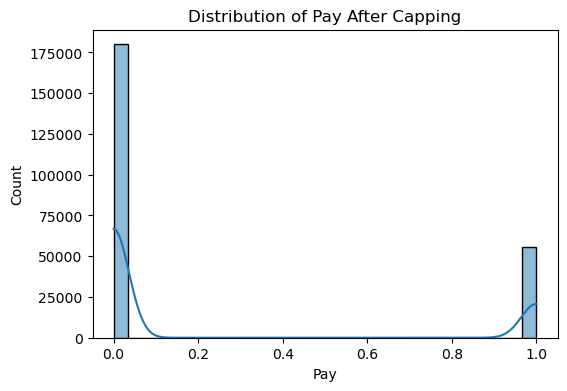

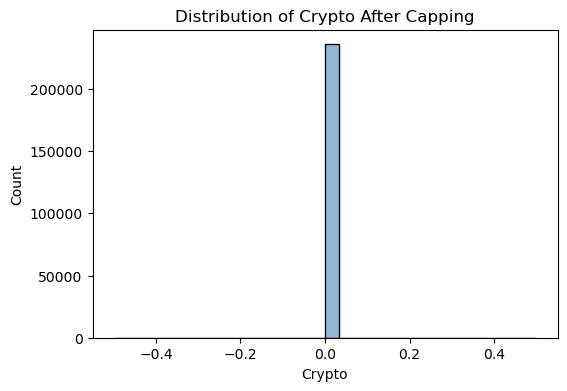

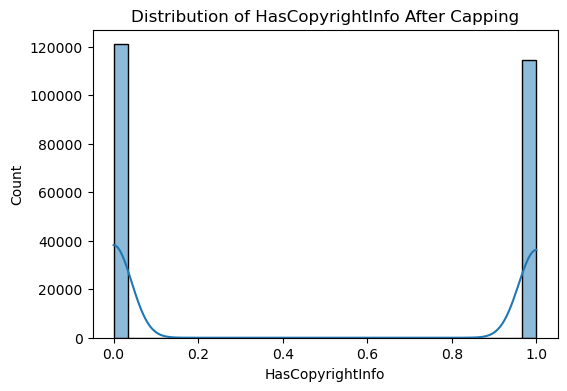

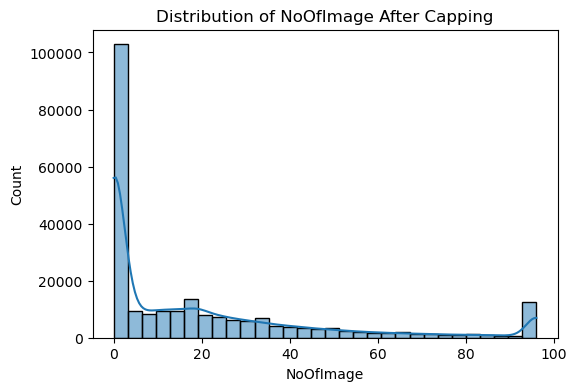

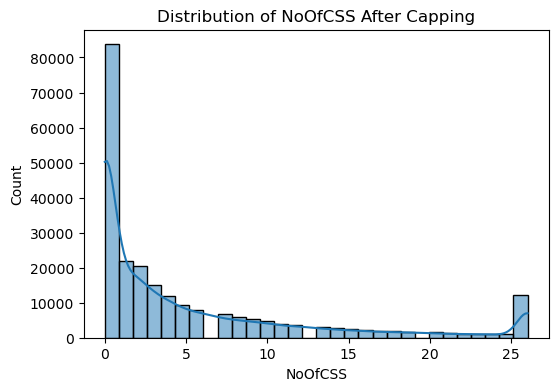

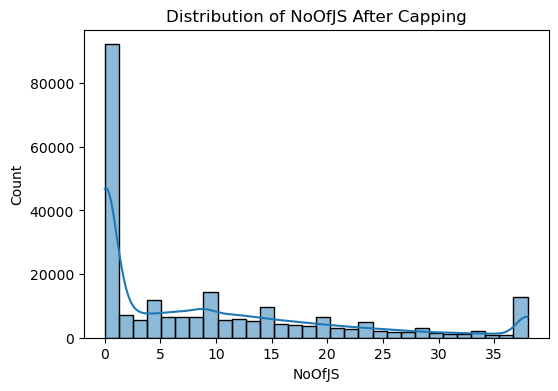

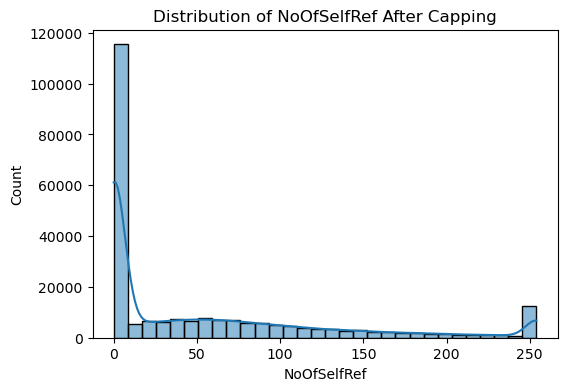

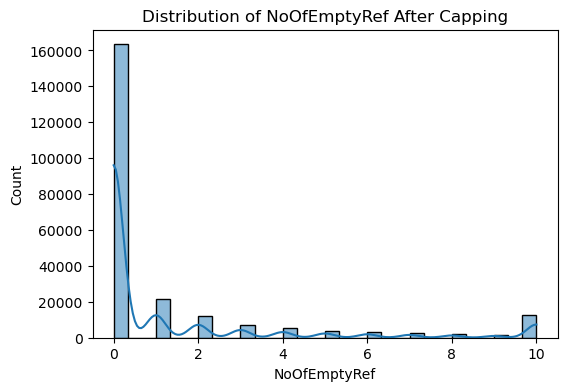

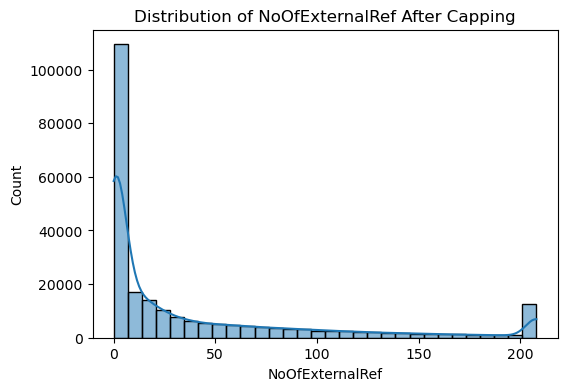

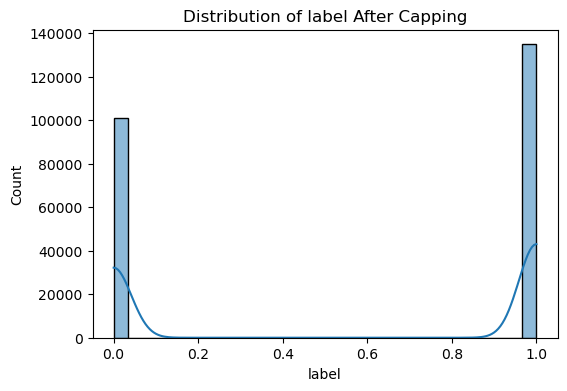

In [46]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col} After Capping")
    plt.show()

# Model Training

In [52]:
from sklearn.model_selection import train_test_split

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [56]:
# train test split
X = df.drop(columns=["label"])
y = df["label"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [58]:
X_train

URLLength  DomainLength  IsDomainIP  TLD  URLSimilarityIndex  \
104874  -0.255920     -0.488527         0.0  231            0.744382   
176003  -0.304330     -0.707087         0.0  387            0.744382   
137445  -0.207510     -0.269966         0.0  578           -0.685920   
38100    0.107152      1.150679         0.0  503            0.744382   
65088   -0.110691      0.167156         0.0  231            0.744382   
...           ...           ...         ...  ...                 ...   
160997  -0.062281      0.385716         0.0  141            0.744382   
155379  -0.255920     -0.379246         0.0  231           -0.485817   
174379   0.470225      1.806361         0.0  226           -1.495252   
920     -0.183305     -0.160685         0.0  231            0.744382   
172904  -0.304330     -0.597807         0.0  231            0.430978   

        CharContinuationRate  TLDLegitimateProb  URLCharProb  TLDLength  \
104874              1.000000           0.522907     0.062244        3.0   
176003              0.750000           0.023045     0.067273        2.0   
137445              1.000000           0.001766     0.057979        3.0   
38100               0.666667           0.079963     0.057367        3.0   
65088               0.600000           0.522907     0.062630        3.0   
...                      ...                ...          ...        ...   
160997              0.666667           0.010086     0.053966        2.0   
155379              1.000000           0.522907     0.064934        3.0   
174379              0.744186           0.005977     0.062050        2.0   
920                 1.000000           0.522907     0.062886        3.0   
172904              1.000000           0.522907     0.062053        3.0   

        NoOfSubDomain  ...  Bank  Pay  Crypto  HasCopyrightInfo  NoOfImage  \
104874      -0.274154  ...   0.0  0.0     0.0               1.0       37.0   
176003       1.389828  ...   0.0  0.0     0.0               1.0       81.0   
137445      -0.274154  ...   0.0  0.0     0.0               0.0        0.0   
38100        1.389828  ...   0.0  0.0     0.0               1.0       27.0   
65088       -0.274154  ...   0.0  1.0     0.0               0.0       29.0   
...               ...  ...   ...  ...     ...               ...        ...   
160997       1.389828  ...   0.0  1.0     0.0               1.0        2.0   
155379      -0.274154  ...   0.0  0.0     0.0               0.0        0.0   
174379       1.389828  ...   0.0  0.0     0.0               0.0        0.0   
920         -0.274154  ...   0.0  0.0     0.0               1.0       11.0   
172904      -0.274154  ...   0.0  0.0     0.0               0.0        0.0   

        NoOfCSS  NoOfJS  NoOfSelfRef  NoOfEmptyRef  NoOfExternalRef  
104874     21.0    24.0        149.0           1.0             28.0  
176003      3.0     7.0         61.0           4.0             22.0  
137445      0.0     0.0          0.0           0.0              0.0  
38100       8.0    10.0          3.0           5.0             11.0  
65088       9.0    14.0        136.0           1.0            135.0  
...         ...     ...          ...           ...              ...  
160997      6.0    11.0        114.0           3.0              8.0  
155379      0.0     0.0          0.0           0.0              0.0  
174379      0.0     0.0          0.0           0.0              2.0  
920        26.0    16.0         60.0           2.0             63.0  
172904      0.0     0.0          0.0           0.0              0.0  

[188636 rows x 52 columns]

In [60]:
X_test

URLLength  DomainLength  IsDomainIP  TLD  URLSimilarityIndex  \
173310  -0.231715     -0.379246         0.0  231            0.744382   
62486   -0.231715     -0.379246         0.0  225            0.744382   
14858   -0.255920     -0.488527         0.0  231            0.744382   
82943   -0.062281      0.385716         0.0  231            0.744382   
72539   -0.280125     -0.597807         0.0  231            0.744382   
...           ...           ...         ...  ...                 ...   
109651  -0.207510     -0.379246         0.0  258           -1.524978   
133536  -0.352739     -0.925648         0.0  254            0.744382   
192832  -0.086486      0.276436         0.0  231            0.744382   
92195   -0.134896      0.057875         0.0  231            0.744382   
153247  -0.255920     -0.488527         0.0  231            0.744382   

        CharContinuationRate  TLDLegitimateProb  URLCharProb  TLDLength  \
173310              1.000000           0.522907     0.063855        3.0   
62486               0.727273           0.003322     0.048722        2.0   
14858               1.000000           0.522907     0.063283        3.0   
82943               1.000000           0.522907     0.056111        3.0   
72539               1.000000           0.522907     0.050065        3.0   
...                      ...                ...          ...        ...   
109651              0.571429           0.000961     0.040353        3.0   
133536              1.000000           0.032650     0.046851        2.0   
192832              1.000000           0.522907     0.062196        3.0   
92195               1.000000           0.522907     0.067931        3.0   
153247              1.000000           0.522907     0.069195        3.0   

        NoOfSubDomain  ...  Bank  Pay  Crypto  HasCopyrightInfo  NoOfImage  \
173310      -0.274154  ...   0.0  0.0     0.0               1.0       16.0   
62486        1.389828  ...   0.0  0.0     0.0               0.0       62.0   
14858       -0.274154  ...   0.0  0.0     0.0               1.0        9.0   
82943       -0.274154  ...   1.0  1.0     0.0               1.0       64.0   
72539       -0.274154  ...   1.0  1.0     0.0               1.0       35.0   
...               ...  ...   ...  ...     ...               ...        ...   
109651      -0.274154  ...   0.0  0.0     0.0               0.0        0.0   
133536      -0.274154  ...   0.0  0.0     0.0               1.0       43.0   
192832      -0.274154  ...   1.0  1.0     0.0               1.0       31.0   
92195       -0.274154  ...   0.0  0.0     0.0               1.0       52.0   
153247      -0.274154  ...   0.0  0.0     0.0               0.0        3.0   

        NoOfCSS  NoOfJS  NoOfSelfRef  NoOfEmptyRef  NoOfExternalRef  
173310     12.0    29.0         65.0           0.0             11.0  
62486       6.0     8.0        121.0           0.0            127.0  
14858       7.0    12.0          6.0           0.0              6.0  
82943       5.0     5.0        254.0           2.0            208.0  
72539       3.0    22.0        103.0           0.0              9.0  
...         ...     ...          ...           ...              ...  
109651      2.0     2.0          2.0           0.0              0.0  
133536      6.0    18.0        254.0           1.0             45.0  
192832      5.0    23.0         69.0           3.0             19.0  
92195      15.0    38.0          1.0           0.0             17.0  
153247      2.0     8.0          0.0           0.0             31.0  

[47159 rows x 52 columns]

In [62]:
y_train

104874    1.0
176003    1.0
137445    0.0
38100     1.0
65088     1.0
         ... 
160997    1.0
155379    0.0
174379    0.0
920       1.0
172904    0.0
Name: label, Length: 188636, dtype: float64

In [64]:
y_test

173310    1.0
62486     1.0
14858     1.0
82943     1.0
72539     1.0
         ... 
109651    0.0
133536    1.0
192832    1.0
92195     1.0
153247    1.0
Name: label, Length: 47159, dtype: float64

In [66]:
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (188636, 52)
Test set size: (47159, 52)


# Logistic Regression

In [69]:
log_reg = LogisticRegression(max_iter=500, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

In [71]:
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

In [73]:
print(f"Accuracy: {accuracy_log_reg}")
print(f"Precision: {precision_log_reg}")
print(f"Recall: {recall_log_reg}")
print(f"F1-Score: {f1_log_reg}")
print("\nConfusion Matrix:")
print(conf_matrix_log_reg)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

Accuracy: 0.9942746877584342
Precision: 0.9962825278810409
Recall: 0.9936967000370782
F1-Score: 0.9949879339149805

Confusion Matrix:
[[20089   100]
 [  170 26800]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     20189
         1.0       1.00      0.99      0.99     26970

    accuracy                           0.99     47159
   macro avg       0.99      0.99      0.99     47159
weighted avg       0.99      0.99      0.99     47159



In [75]:
#feature importance score
feature_importance_log_reg = np.abs(log_reg.coef_[0])
feature_importance_df_log_reg = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance_log_reg})
feature_importance_df_log_reg = feature_importance_df_log_reg.sort_values(by='Importance', ascending=False)
top_20_features_log_reg = feature_importance_df_log_reg.head(20)
print(top_20_features_log_reg)

                       Feature  Importance
4           URLSimilarityIndex    2.037491
8                    TLDLength    1.933488
27       DomainTitleMatchScore    0.930430
20  NoOfOtherSpecialCharsInURL    0.679716
14            LetterRatioInURL    0.670473
9                NoOfSubDomain    0.634822
34              HasDescription    0.458307
45            HasCopyrightInfo    0.429026
25                    HasTitle    0.410500
5         CharContinuationRate    0.403405
47                     NoOfCSS    0.393409
38                HasSocialNet    0.351534
13            NoOfLettersInURL    0.337627
50                NoOfEmptyRef    0.328309
6            TLDLegitimateProb    0.317517
15             NoOfDegitsInURL    0.296171
0                    URLLength    0.296162
23                  LineOfCode    0.292999
31                IsResponsive    0.272246
42                        Bank    0.266203


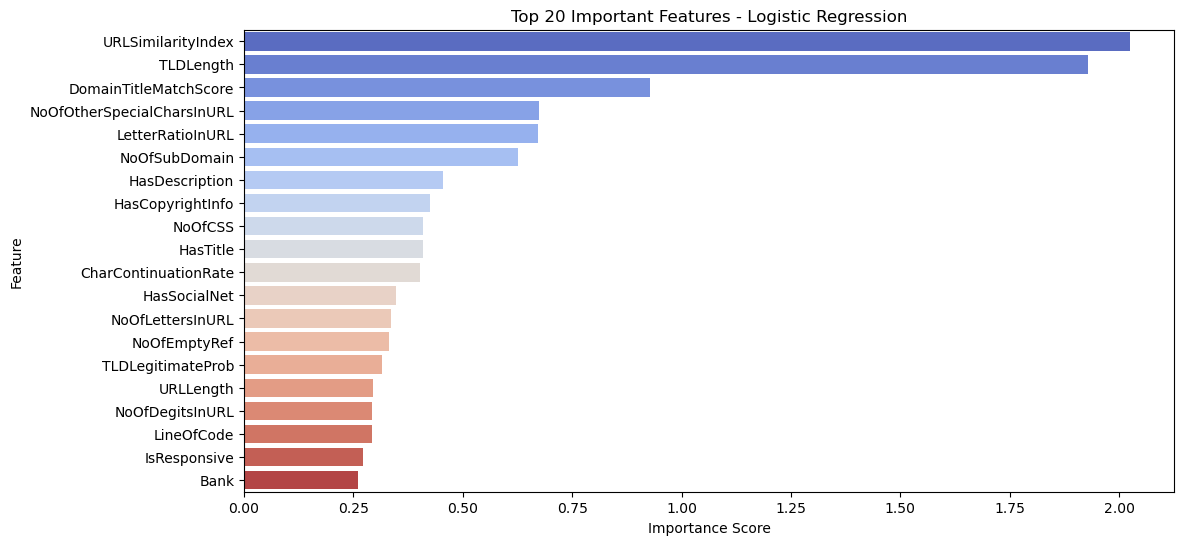

In [61]:
# Visualizing Feature Importance
plt.figure(figsize=(12, 6))
sns.barplot(x=top_20_features_log_reg['Importance'], y=top_20_features_log_reg['Feature'], palette='coolwarm')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 20 Important Features - Logistic Regression")
plt.show()

# Ridge & Lasso

In [77]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

In [79]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

In [81]:
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_r2 = r2_score(y_test, ridge_pred)

In [83]:
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_r2 = r2_score(y_test, lasso_pred)

In [85]:
print("Ridge Regression Performance:")
print(f"MSE: {ridge_mse}, \n RMSE: {ridge_rmse},\n R² Score: {ridge_r2}")

print("\nLasso Regression Performance:")
print(f"MSE: {lasso_mse},\n RMSE: {lasso_rmse},\n R² Score: {lasso_r2}")

Ridge Regression Performance:
MSE: 0.015421407931556573, 
 RMSE: 0.12418296151870664,
 R² Score: 0.9370120541227127

Lasso Regression Performance:
MSE: 0.021334316555910744,
 RMSE: 0.14606271446166794,
 R² Score: 0.9128610835977684


In [143]:
#Convert Predictions to Binary Class Labels
ridge_pred_binary = [1 if pred >= 0.5 else 0 for pred in ridge_pred]
lasso_pred_binary = [1 if pred >= 0.5 else 0 for pred in lasso_pred]

In [147]:
ridge_accuracy = accuracy_score(y_test, ridge_pred_binary)
ridge_precision = precision_score(y_test, ridge_pred_binary)
ridge_recall = recall_score(y_test, ridge_pred_binary)
ridge_f1 = f1_score(y_test, ridge_pred_binary)
ridge_conf_matrix = confusion_matrix(y_test, ridge_pred_binary)

lasso_accuracy = accuracy_score(y_test, lasso_pred_binary)
lasso_precision = precision_score(y_test, lasso_pred_binary)
lasso_recall = recall_score(y_test, lasso_pred_binary)
lasso_f1 = f1_score(y_test, lasso_pred_binary)
lasso_conf_matrix = confusion_matrix(y_test, lasso_pred_binary)

print("Ridge Regression - Classification Metrics:")
print(f"Accuracy: {ridge_accuracy:.4f},\n Precision: {ridge_precision:.4f},\n Recall: {ridge_recall:.4f},\n F1-score: {ridge_f1:.4f}\n")
print("Confusion Matrix:\n", ridge_conf_matrix)

print("\nLasso Regression - Classification Metrics:")
print(f"Accuracy: {lasso_accuracy:.4f},\n Precision: {lasso_precision:.4f},\n Recall: {lasso_recall:.4f},\n F1-score: {lasso_f1:.4f}\n")
print("Confusion Matrix:\n", lasso_conf_matrix)

print("\nClassification Report:Ridge")
print(classification_report(y_test, ridge_pred_binary))

print("\nClassification Report:Lasso")
print(classification_report(y_test, lasso_pred_binary))

Ridge Regression - Classification Metrics:
Accuracy: 0.9994,
 Precision: 0.9990,
 Recall: 1.0000,
 F1-score: 0.9995

Confusion Matrix:
 [[20161    28]
 [    0 26970]]

Lasso Regression - Classification Metrics:
Accuracy: 0.9991,
 Precision: 0.9984,
 Recall: 1.0000,
 F1-score: 0.9992

Confusion Matrix:
 [[20147    42]
 [    0 26970]]

Classification Report:Ridge
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20189
         1.0       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159


Classification Report:Lasso
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20189
         1.0       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted

In [87]:
# Feature Importance
ridge_feature_importance = np.abs(ridge_model.coef_)
ridge_feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': ridge_feature_importance})
ridge_feature_df_top_20 = ridge_feature_df.sort_values(by='Importance', ascending=False).head(20)
print("Top 20 Features (Ridge):")
ridge_feature_df_top_20

Top 20 Features (Ridge):


Feature  Importance
21  SpacialCharRatioInURL    0.788005
0               URLLength    0.673891
16        DegitRatioInURL    0.532216
24      LargestLineLength    0.393416
4      URLSimilarityIndex    0.286646
13       NoOfLettersInURL    0.251278
22                IsHTTPS    0.244173
7             URLCharProb    0.179788
38           HasSocialNet    0.093260
45       HasCopyrightInfo    0.092842
15        NoOfDegitsInURL    0.087432
6       TLDLegitimateProb    0.065423
34         HasDescription    0.064200
14       LetterRatioInURL    0.041558
9           NoOfSubDomain    0.034991
39        HasSubmitButton    0.033308
29             HasFavicon    0.028782
23             LineOfCode    0.023576
32        NoOfURLRedirect    0.021861
5    CharContinuationRate    0.018622

In [89]:
lasso_feature_importance = np.abs(lasso_model.coef_)
print(type(lasso_feature_importance))
lasso_feature_importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": lasso_feature_importance.flatten() })
lasso_feature_df_top_20 = lasso_feature_importance_df.sort_values(by='Importance', ascending=False).head(20)
lasso_feature_df_top_20['Importance'] = lasso_feature_df_top_20['Importance'].apply(lambda x: round(x, 6))
print("Top 20 Features (Lasso):")
lasso_feature_df_top_20

<class 'numpy.ndarray'>
Top 20 Features (Lasso):


Feature  Importance
4      URLSimilarityIndex    0.237029
22                IsHTTPS    0.228970
45       HasCopyrightInfo    0.088163
38           HasSocialNet    0.076110
34         HasDescription    0.054206
9           NoOfSubDomain    0.034667
29             HasFavicon    0.007331
39        HasSubmitButton    0.004329
48                 NoOfJS    0.002675
47                NoOfCSS    0.002128
28     URLTitleMatchScore    0.001024
46              NoOfImage    0.000834
50           NoOfEmptyRef    0.000453
49            NoOfSelfRef    0.000282
3                     TLD    0.000165
51        NoOfExternalRef    0.000160
26                  Title    0.000000
17        NoOfEqualsInURL    0.000000
43                    Pay    0.000000
37  HasExternalFormSubmit    0.000000

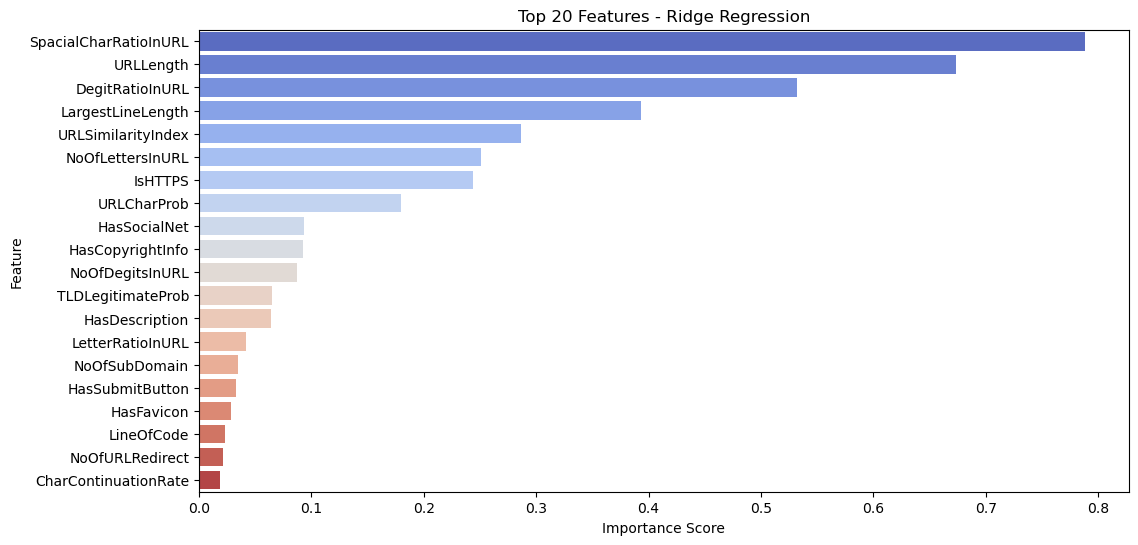

In [70]:
# Plot Ridge Top 20 Features
plt.figure(figsize=(12, 6))
sns.barplot(x=ridge_feature_df_top_20['Importance'], y=ridge_feature_df_top_20['Feature'], palette='coolwarm')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 20 Features - Ridge Regression")
plt.show()

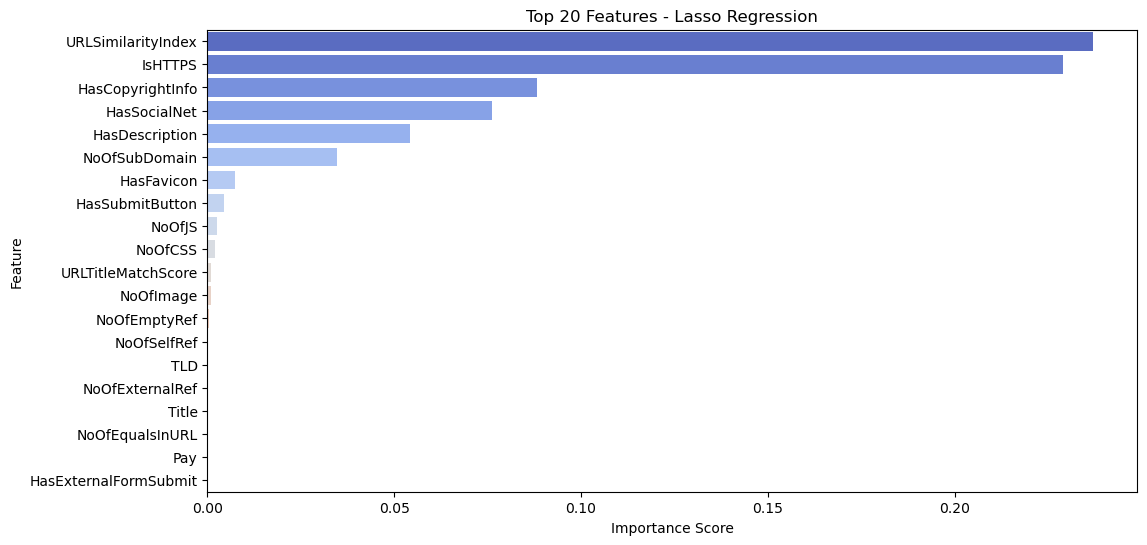

In [71]:
# Plot Lasso Top 20 Features
plt.figure(figsize=(12, 6))
sns.barplot(x=lasso_feature_df_top_20['Importance'], y=lasso_feature_df_top_20['Feature'], palette='coolwarm')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Top 20 Features - Lasso Regression")
plt.show()

# Decision Tree

In [158]:
dt_model = DecisionTreeClassifier(max_depth=10,min_samples_split=5,min_samples_leaf=2,random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [160]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

In [162]:
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [164]:
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-score: {f1_dt:.4f}")
print(f"Mean Squared Error (MSE): {mse_dt:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.4f}")
print(f"R² Score: {r2_dt:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_dt)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
R² Score: 1.0000

Confusion Matrix:
[[20189     0]
 [    0 26970]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20189
         1.0       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



In [99]:
feature_importance = dt_model.feature_importances_
dt_feature_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})
dt_feature_df_top_20 = dt_feature_df.sort_values(by='Importance', ascending=False).head(20)
dt_feature_df_top_20

Feature  Importance
4      URLSimilarityIndex    0.986845
23             LineOfCode    0.012722
22                IsHTTPS    0.000390
9           NoOfSubDomain    0.000043
0               URLLength    0.000000
39        HasSubmitButton    0.000000
30                 Robots    0.000000
31           IsResponsive    0.000000
32        NoOfURLRedirect    0.000000
33       NoOfSelfRedirect    0.000000
34         HasDescription    0.000000
35              NoOfPopup    0.000000
36             NoOfiFrame    0.000000
37  HasExternalFormSubmit    0.000000
38           HasSocialNet    0.000000
40        HasHiddenFields    0.000000
28     URLTitleMatchScore    0.000000
41       HasPasswordField    0.000000
42                   Bank    0.000000
43                    Pay    0.000000

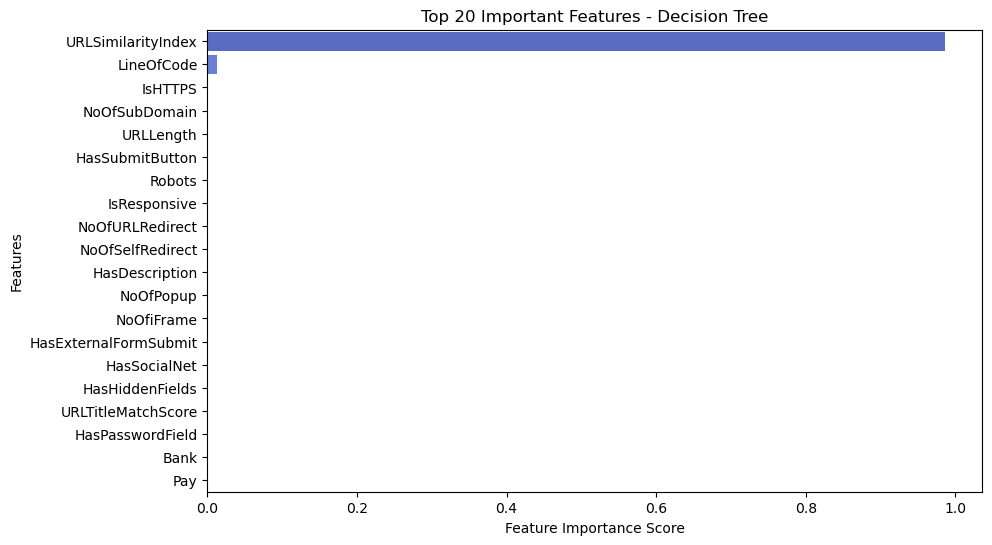

In [78]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_feature_df_top_20, palette="coolwarm")
plt.title("Top 20 Important Features - Decision Tree")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

# KNN

In [101]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [103]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

In [105]:
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1-score: {f1_knn:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_knn)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.9220
Precision: 0.9395
Recall: 0.9231
F1-score: 0.9312

Confusion Matrix:
[[18586  1603]
 [ 2075 24895]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.92      0.91     20189
         1.0       0.94      0.92      0.93     26970

    accuracy                           0.92     47159
   macro avg       0.92      0.92      0.92     47159
weighted avg       0.92      0.92      0.92     47159



In [107]:
distances, indices = knn_model.kneighbors(X_test)

In [108]:
# Using Distance-Based Feature Importance
feature_importance_knn = np.zeros(X_train.shape[1])

In [109]:
for i, idx in enumerate(indices):
    neighbor_samples = X_train.iloc[idx] 
    feature_diffs = np.abs(X_test.iloc[i] - neighbor_samples).mean(axis=0) 
    feature_importance_knn += feature_diffs.values 
feature_importance_knn

array([6.37743586e+03, 2.10467884e+04, 0.00000000e+00, 5.19932000e+05,
       1.21867526e+04, 3.95029759e+03, 2.82953611e+03, 2.75863033e+02,
       7.96540000e+03, 1.14741540e+04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.26600837e+03, 2.92215346e+04, 2.36686972e+03,
       6.27619400e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.21942079e+03, 7.09967400e+02, 5.79900000e+03, 8.25711944e+03,
       1.39134279e+03, 8.80000000e+00, 1.00039000e+06, 5.57682083e+03,
       1.90090492e+05, 1.51312000e+04, 1.23982000e+04, 1.14126000e+04,
       7.91940000e+03, 0.00000000e+00, 1.30816000e+04, 4.70020000e+03,
       6.17062000e+04, 0.00000000e+00, 9.95060000e+03, 1.30316000e+04,
       1.42752000e+04, 7.04120000e+03, 8.00220000e+03, 1.28002000e+04,
       0.00000000e+00, 1.13468000e+04, 5.51778800e+05, 2.12137600e+05,
       3.03852400e+05, 7.55004600e+05, 8.01088000e+04, 6.46527800e+05])

In [110]:
feature_importance_knn /= len(X_test)

In [111]:
knn_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_knn
})

In [117]:
knn_feature_top_20 = knn_feature_importance_df.sort_values(by='Importance', ascending=False).head(20)

In [119]:
print("Top 20 Features (KNN - Distance-Based Importance):")
print(knn_feature_top_20)

Top 20 Features (KNN - Distance-Based Importance):
               Feature  Importance
26               Title   21.213130
49         NoOfSelfRef   16.009767
51     NoOfExternalRef   13.709532
46           NoOfImage   11.700392
3                  TLD   11.025085
48              NoOfJS    6.443148
47             NoOfCSS    4.498348
28  URLTitleMatchScore    4.030842
50        NoOfEmptyRef    1.698696
36          NoOfiFrame    1.308471
14    LetterRatioInURL    0.619639
1         DomainLength    0.446294
29          HasFavicon    0.320855
40     HasHiddenFields    0.302704
34      HasDescription    0.277393
39     HasSubmitButton    0.276333
43                 Pay    0.271426
30              Robots    0.262902
4   URLSimilarityIndex    0.258418
9        NoOfSubDomain    0.243308


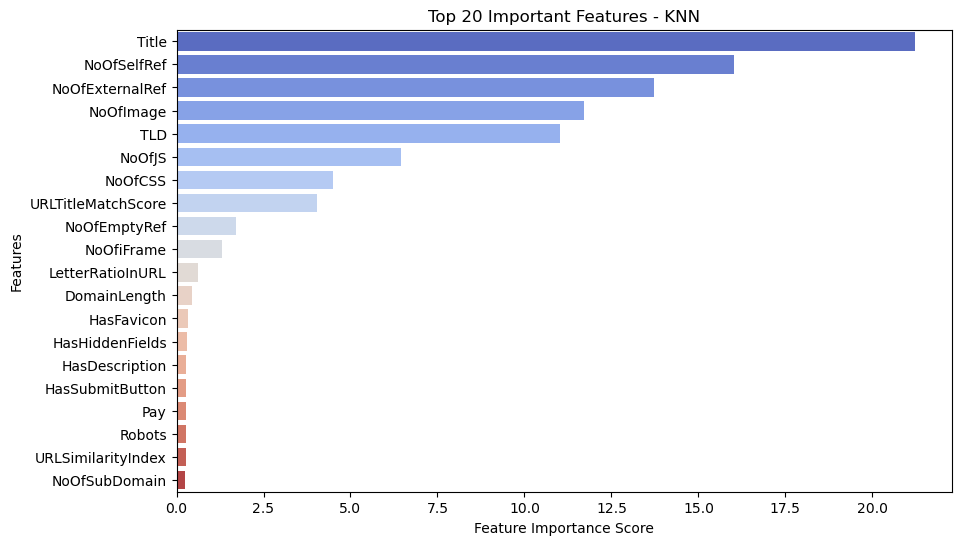

In [90]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=knn_feature_top_20, palette="coolwarm")
plt.title("Top 20 Important Features - KNN")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

# Random Forest

In [166]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10,min_samples_split=5,min_samples_leaf=2,random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf= rf_model.predict(X_test)

In [168]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest Precision: {precision_rf:.4f}")
print(f"Random Forest Recall: {recall_rf:.4f}")
print(f"Random Forest F1 Score: {f1_rf:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_rf}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0000
Random Forest Precision: 1.0000
Random Forest Recall: 1.0000
Random Forest F1 Score: 1.0000
Confusion Matrix:
[[20188     1]
 [    0 26970]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20189
         1.0       1.00      1.00      1.00     26970

    accuracy                           1.00     47159
   macro avg       1.00      1.00      1.00     47159
weighted avg       1.00      1.00      1.00     47159



In [125]:
# Feature Importance
rf_feature_importance = rf_model.feature_importances_
rf_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_feature_importance
})
rf_feature_top_20 = rf_feature_importance_df.sort_values(by='Importance', ascending=False).head(20)
print("Top 20 Features (Random Forest):")
print(rf_feature_top_20)

Top 20 Features (Random Forest):
                       Feature  Importance
4           URLSimilarityIndex    0.226794
23                  LineOfCode    0.132070
51             NoOfExternalRef    0.111394
46                   NoOfImage    0.104473
49                 NoOfSelfRef    0.090267
47                     NoOfCSS    0.058501
48                      NoOfJS    0.053036
45            HasCopyrightInfo    0.041948
38                HasSocialNet    0.025173
22                     IsHTTPS    0.022941
34              HasDescription    0.022833
20  NoOfOtherSpecialCharsInURL    0.020387
28          URLTitleMatchScore    0.012416
27       DomainTitleMatchScore    0.009377
15             NoOfDegitsInURL    0.008416
24           LargestLineLength    0.008228
0                    URLLength    0.007522
13            NoOfLettersInURL    0.006952
21       SpacialCharRatioInURL    0.006323
16             DegitRatioInURL    0.006032


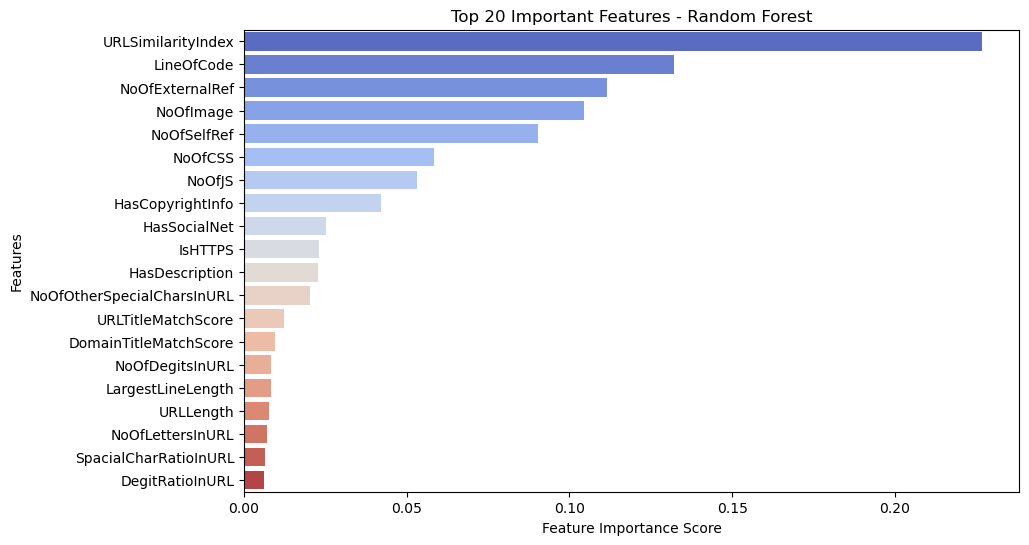

In [141]:
# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_top_20, palette="coolwarm")
plt.title("Top 20 Important Features - Random Forest")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

# SVC

In [129]:
svc_model = SVC(kernel='linear', random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

In [131]:
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)
conf_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print(f"SVM Accuracy: {accuracy_svc:.4f}")
print(f"SVM Precision: {precision_svc:.4f}")
print(f"SVM Recall: {recall_svc:.4f}")
print(f"SVM F1 Score: {f1_svc:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_svc}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svc))

SVM Accuracy: 0.9852
SVM Precision: 0.9913
SVM Recall: 0.9827
SVM F1 Score: 0.9870
Confusion Matrix:
[[19956   233]
 [  467 26503]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     20189
         1.0       0.99      0.98      0.99     26970

    accuracy                           0.99     47159
   macro avg       0.98      0.99      0.98     47159
weighted avg       0.99      0.99      0.99     47159



In [137]:
#feature importance
svc_feature_importance = np.abs(svc_model.coef_).flatten()
svc_feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': svc_feature_importance
})
svc_feature_top_20 = svc_feature_importance_df.sort_values(by='Importance', ascending=False).head(20)
print("Top 20 Features (SVM):")
print(svc_feature_top_20)

Top 20 Features (SVM):
                       Feature   Importance
4           URLSimilarityIndex  4623.749502
46                   NoOfImage  4379.449007
51             NoOfExternalRef  3974.400899
49                 NoOfSelfRef  2923.323433
47                     NoOfCSS  2640.289758
9                NoOfSubDomain  2113.940831
14            LetterRatioInURL  1760.176691
48                      NoOfJS  1731.840247
22                     IsHTTPS  1667.413460
34              HasDescription  1634.441753
45            HasCopyrightInfo  1605.723039
20  NoOfOtherSpecialCharsInURL  1355.001057
50                NoOfEmptyRef  1178.929602
38                HasSocialNet  1115.000000
36                  NoOfiFrame  1011.411605
27       DomainTitleMatchScore   891.298828
13            NoOfLettersInURL   857.364898
0                    URLLength   713.957001
28          URLTitleMatchScore   685.523019
15             NoOfDegitsInURL   601.119606


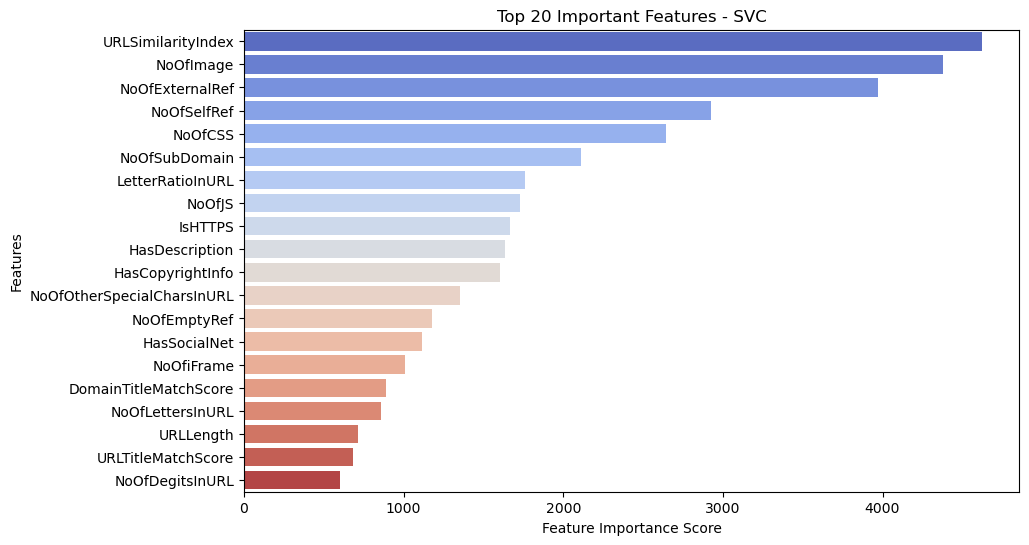

In [139]:
# Top 20 visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=svc_feature_top_20, palette="coolwarm")
plt.title("Top 20 Important Features - SVC")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

# Model Comparison

In [170]:
model_metrics = {
    "Logistic Regression": [accuracy_log_reg, precision_log_reg, recall_log_reg, f1_log_reg],
    "Ridge Regression": [ridge_accuracy, ridge_precision, ridge_recall, ridge_f1],
    "Lasso Regression": [lasso_accuracy, lasso_precision, lasso_recall, lasso_f1],
    "Decision Tree": [accuracy_dt, precision_dt, recall_dt, f1_dt],
    "KNN": [accuracy_knn, precision_knn, recall_knn, f1_knn],
    "Random Forest": [accuracy_rf, precision_rf, recall_rf, f1_rf],
    "SVM": [accuracy_svc, precision_svc, recall_svc, f1_svc]
}
metrics_df = pd.DataFrame.from_dict(
    model_metrics, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score']
)

In [172]:
metrics_df

Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.994275   0.996283  0.993697  0.994988
Ridge Regression     0.999406   0.998963  1.000000  0.999481
Lasso Regression     0.999109   0.998445  1.000000  0.999222
Decision Tree        1.000000   1.000000  1.000000  1.000000
KNN                  0.922009   0.939505  0.923063  0.931211
Random Forest        0.999979   0.999963  1.000000  0.999981
SVM                  0.985157   0.991285  0.982684  0.986966

In [174]:
metrics_df_sorted = metrics_df.sort_values(by="F1-Score", ascending=False)

In [176]:
print("\n Sorted Model Performance (by F1-Score):\n")
print(metrics_df_sorted)


 Sorted Model Performance (by F1-Score):

                     Accuracy  Precision    Recall  F1-Score
Decision Tree        1.000000   1.000000  1.000000  1.000000
Random Forest        0.999979   0.999963  1.000000  0.999981
Ridge Regression     0.999406   0.998963  1.000000  0.999481
Lasso Regression     0.999109   0.998445  1.000000  0.999222
Logistic Regression  0.994275   0.996283  0.993697  0.994988
SVM                  0.985157   0.991285  0.982684  0.986966
KNN                  0.922009   0.939505  0.923063  0.931211
